In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../Functions and Dictionaries/") # Adds higher directory to python modules path
import geodict
namestocommon = geodict.namestocommon

In [2]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [3]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [4]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [5]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat):
    for j, k in zip(x, y):
        label = labelformat.format(k)
        plt.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset, yoffset), ha = 'center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [6]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = '#064460', '#d6d0d3', '#04979e', '#4f853d', '#808989', '#0C2428', '#414543', '#a9d6bd', '#e8ebbc'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9, GNRCLIGHTBLUE]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [13]:
Primary = 'Rutherford County'

In [9]:
#LEHD Area Characteristics
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [LEHD_WacRac_ACS5_2019]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = ['Source', 'GEO_ID'], inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
data[cols] = data[cols].astype(float)
ac = data

In [10]:
ac.head()

,NAME,WAC:Total Jobs,WAC:Age:Workers 29 or Younger,WAC:Age:Workers 30 to 54,WAC:Age:Workers 55 Older,WAC:Earnings:1250mo or Less,WAC:Earnings:1251 to 3333mo,WAC:Earnings:Greater Than 3333mo,"WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting","WAC:NAICS:21Mining, Quarrying, Oil & Gas",WAC:NAICS:22Utilities,WAC:NAICS:23Construction,WAC:NAICS:31to33Manufacturing,WAC:NAICS:42Wholesale Trade,WAC:NAICS:44to45Retail Trade,WAC:NAICS:48to49Transportation & Warehousing,WAC:NAICS:51Information,WAC:NAICS:52Finance & Insurance,WAC:NAICS:53Real Estate & Rental & Leasing,"WAC:NAICS:54Professional, Scientific, & Technical Services",WAC:NAICS:55Management of Companies & Enterprises,WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services,WAC:NAICS:61Educational Services,WAC:NAICS:62Healthcare & Social Assistance,"WAC:NAICS:71Arts, Entertainment, & Recreation",WAC:NAICS:72Accommodation & Food Services,WAC:NAICS:81Other Services (Except Public Administration),WAC:NAICS:92Public Administration,WAC:Race:White Alone,WAC:Race:Black or African American Alone,WAC:Race:American Indian or Alaska Native Alone,WAC:Race:Asian Alone,WAC:Race:Native Hawaiian or Other Pacific Islander Alone,WAC:Race:Two or More Races,WAC:Ethnicity:Not Hispanic or Latino,WAC:Ethnicity:Hispanic or Latino,WAC:Ed:Less than High School,WAC:Ed:High School or Equivalent,WAC:Ed:Some College or Associates,WAC:Ed:Bachelors or Advanced Degree,WAC:Sex:Male,WAC:Sex:Female,WAC:FirmAge:0 to 1 Year,WAC:FirmAge:2 to 3 Years,WAC:FirmAge:4 to 5 Years,WAC:FirmAge:6 to 10 Years,WAC:FirmAge:11 or More Years,WAC:FirmSize:0 to 19 Employees,WAC:FirmSize:20 to 49 Employees,WAC:FirmSize:50 to 249 Employees,WAC:FirmSize:250 to 499 Employees,WAC:FirmSize:500 or More Employees,RAC:Total Jobs,RAC:Age:Workers 29 or Younger,RAC:Age:Workers 30 to 54,RAC:Age:Workers 55 Older,RAC:Earnings:1250mo or Less,RAC:Earnings:1251 to 3333mo,RAC:Earnings:Greater Than 3333mo,"RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting","RAC:NAICS:21Mining, Quarrying, Oil & Gas",RAC:NAICS:22Utilities,RAC:NAICS:23Construction,RAC:NAICS:31to33Manufacturing,RAC:NAICS:42Wholesale Trade,RAC:NAICS:44to45Retail Trade,RAC:NAICS:48to49Transportation & Warehousing,RAC:NAICS:51Information,RAC:NAICS:52Finance & Insurance,RAC:NAICS:53Real Estate & Rental & Leasing,"RAC:NAICS:54Professional, Scientific, & Technical Services",RAC:NAICS:55Management of Companies & Enterprises,RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services,RAC:NAICS:61Educational Services,RAC:NAICS:62Healthcare & Social Assistance,"RAC:NAICS:71Arts, Entertainment, & Recreation",RAC:NAICS:72Accommodation & Food Services,RAC:NAICS:81Other Services (Except Public Administration),RAC:NAICS:92Public Administration,RAC:Race:White Alone,RAC:Race:Black or African American Alone,RAC:Race:American Indian or Alaska Native Alone,RAC:Race:Asian Alone,RAC:Race:Native Hawaiian or Other Pacific Islander Alone,RAC:Race:Two or More Races,RAC:Ethnicity:Not Hispanic or Latino,RAC:Ethnicity:Hispanic or Latino,RAC:Ed:Less than High School,RAC:Ed:High School or Equivalent,RAC:Ed:Some College or Associates,RAC:Ed:Bachelors or Advanced Degree,RAC:Sex:Male,RAC:Sex:Female,WAC:Age%:Workers 29 or Younger,WAC:Age%:Workers 30 to 54,WAC:Age%:Workers 55 Older,WAC:Earnings%:1250mo or Less,WAC:Earnings%:1251 to 3333mo,WAC:Earnings%:Greater Than 3333mo,"WAC:NAICS%:11Agriculture, Forestry, Fishing & Hunting","WAC:NAICS%:21Mining, Quarrying, Oil & Gas",WAC:NAICS%:22Utilities,WAC:NAICS%:23Construction,WAC:NAICS%:31to33Manufacturing,WAC:NAICS%:42Wholesale Trade,WAC:NAICS%:44to45Retail Trade,WAC:NAICS%:48to49Transportation & Warehousing,WAC:NAICS%:51Information,WAC:NAICS%:52Finance & Insurance,WAC:NAICS%:53Real Estate & Rental & Leasing,"WAC:NAICS%:54Professional, Scientific, & Technical Services",WAC:NAICS%:55Management of Companies & Enterprises,WAC:NAICS%:56Administrative & Support & Waste Management & Remediation Services,WAC:NAICS%:61Educational Services,WAC:N

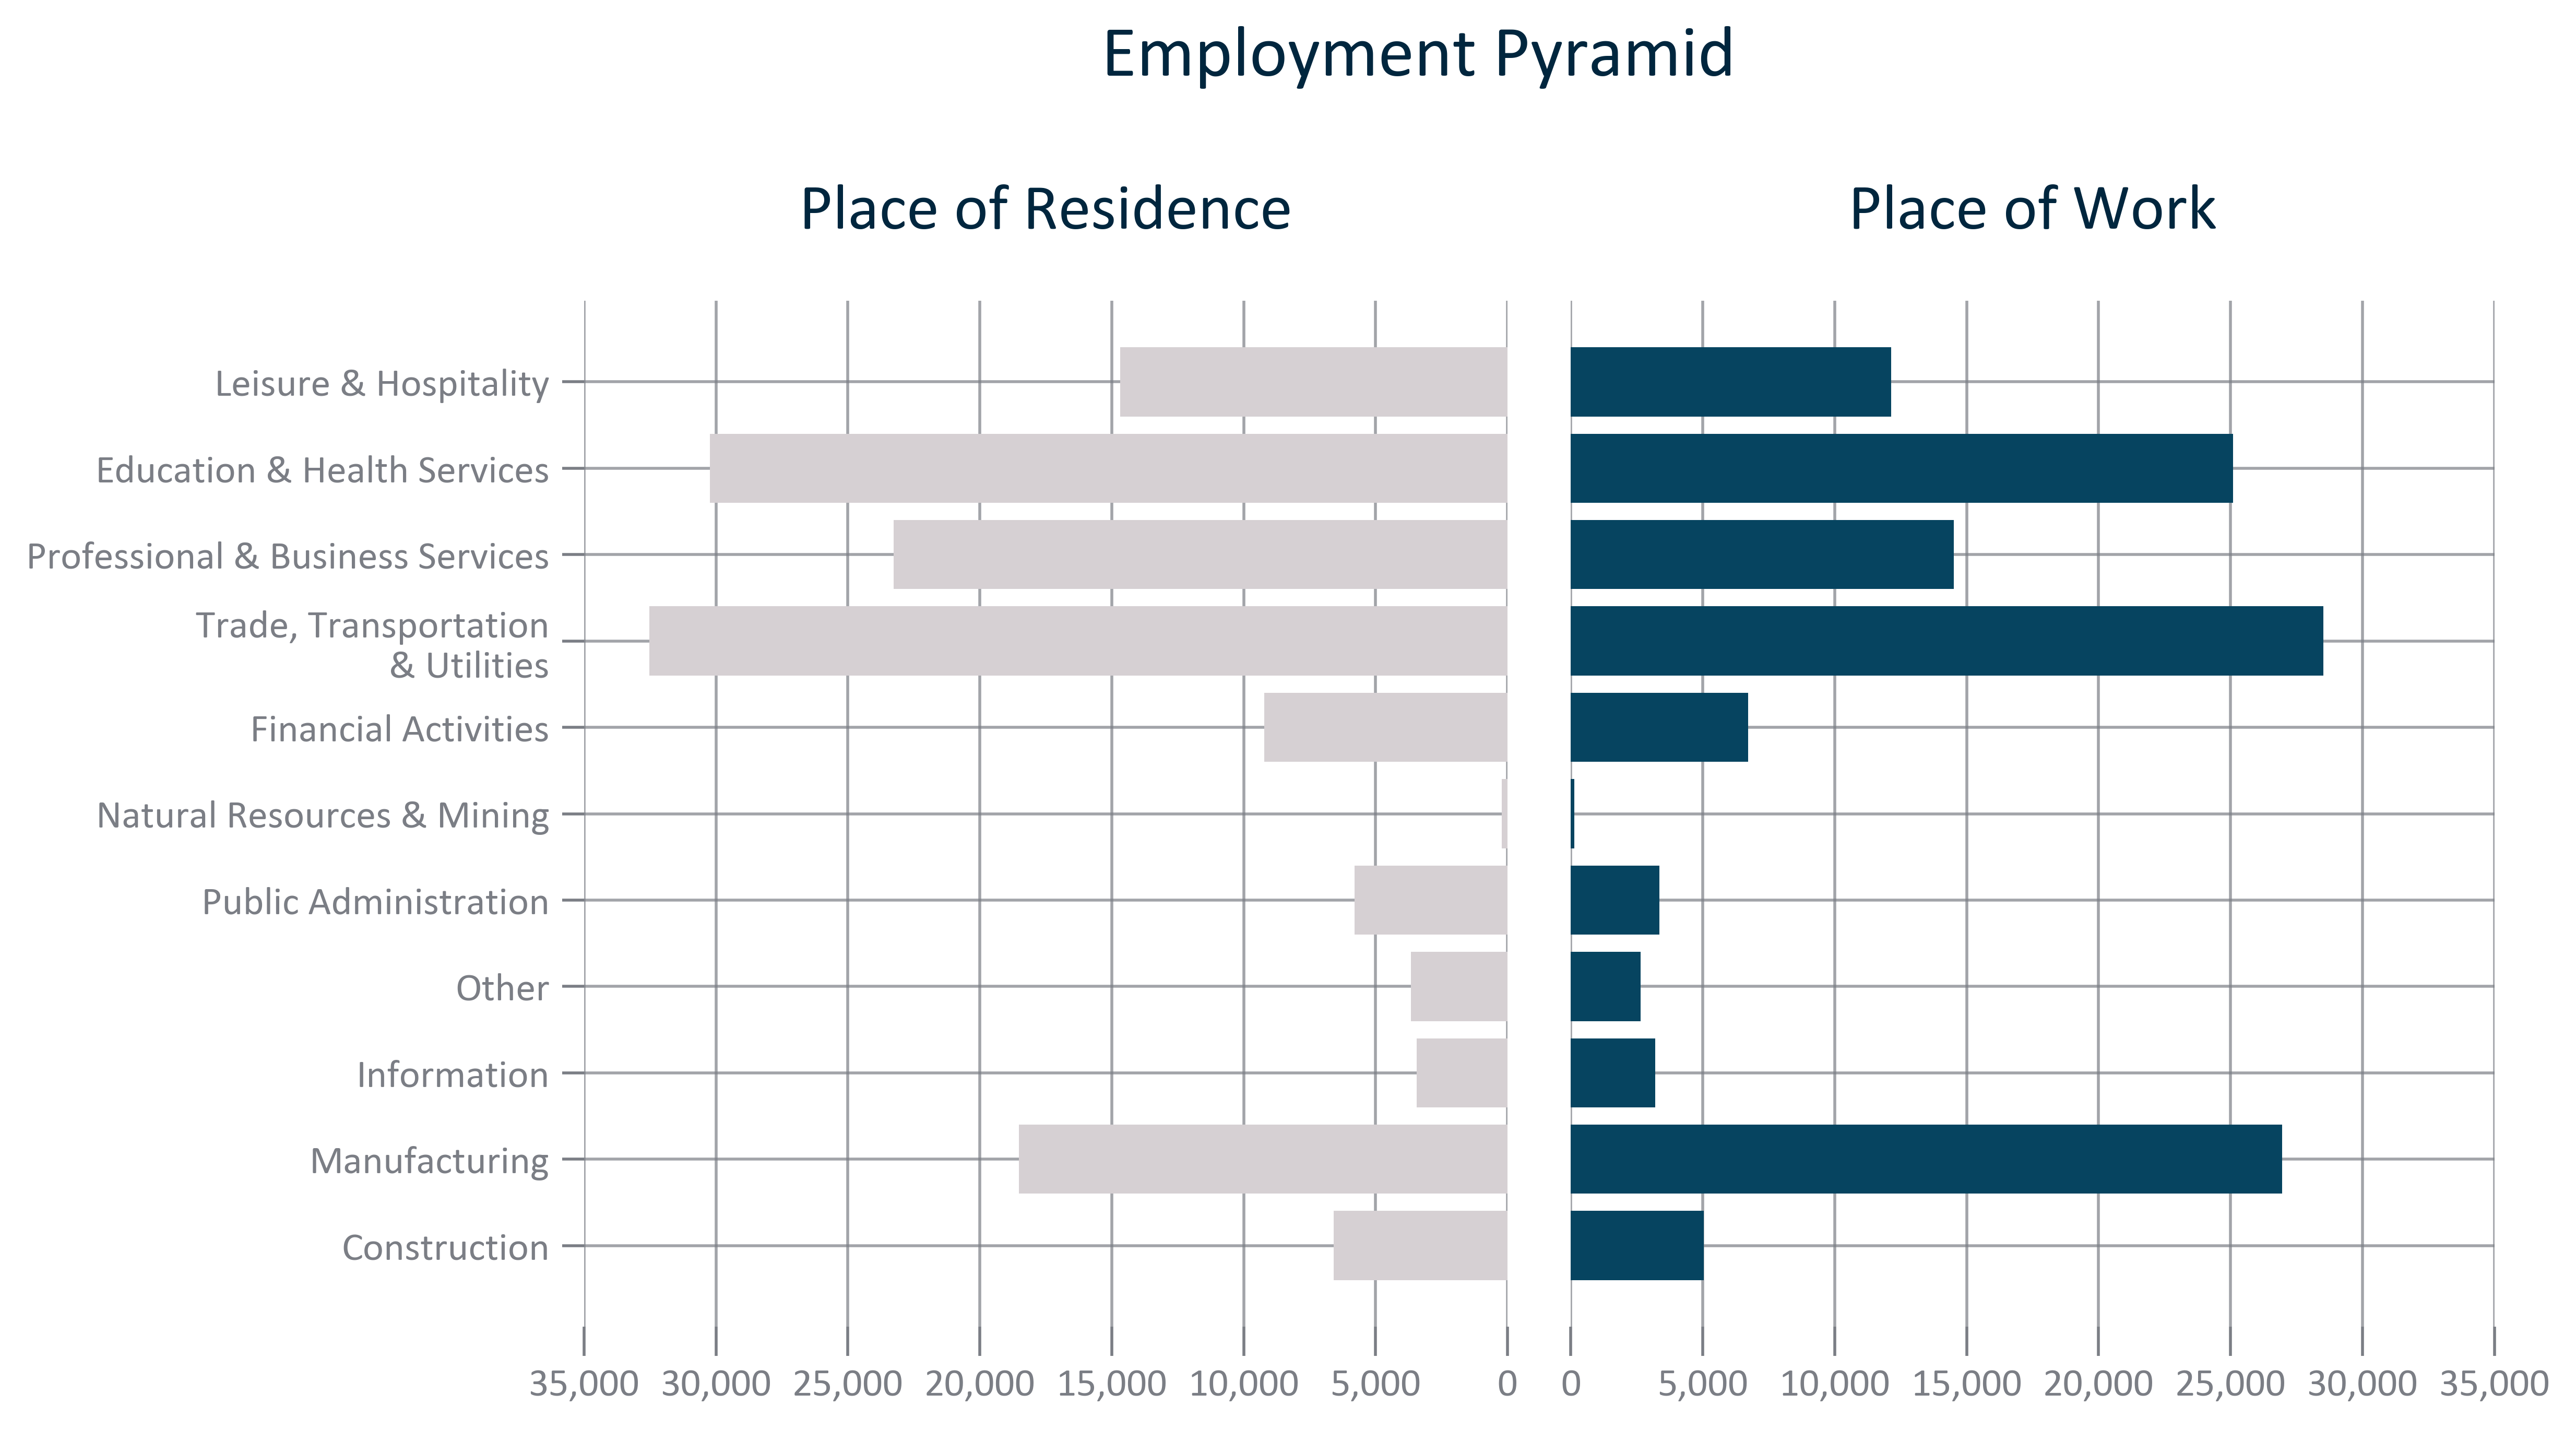

In [16]:
#EMP_PYRAMID
#PRIMARY GEO, POW and POR employment
title = 'Employment Pyramid'
df_temp = ac.loc[ac['NAME'] == Primary]
df_temp1 = df_temp[['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'WAC:NAICS:21Mining, Quarrying, Oil & Gas', 'WAC:NAICS:22Utilities',
                    'WAC:NAICS:23Construction', 'WAC:NAICS:31to33Manufacturing', 'WAC:NAICS:42Wholesale Trade', 'WAC:NAICS:44to45Retail Trade', 
                    'WAC:NAICS:48to49Transportation & Warehousing', 'WAC:NAICS:51Information', 'WAC:NAICS:52Finance & Insurance', 
                    'WAC:NAICS:53Real Estate & Rental & Leasing', 'WAC:NAICS:54Professional, Scientific, & Technical Services', 
                    'WAC:NAICS:55Management of Companies & Enterprises', 'WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                    'WAC:NAICS:61Educational Services', 'WAC:NAICS:62Healthcare & Social Assistance', 'WAC:NAICS:71Arts, Entertainment, & Recreation', 
                    'WAC:NAICS:72Accommodation & Food Services', 'WAC:NAICS:81Other Services (Except Public Administration)', 'WAC:NAICS:92Public Administration']]
df_temp1['Natural Resources & Mining'] = df_temp1['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting'] + df_temp1['WAC:NAICS:21Mining, Quarrying, Oil & Gas']
thelist = [df_temp1['WAC:NAICS:42Wholesale Trade'], df_temp1['WAC:NAICS:53Real Estate & Rental & Leasing']]
df_temp1['Financial Activities'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:52Finance & Insurance'], df_temp1['WAC:NAICS:44to45Retail Trade'], 
           df_temp1['WAC:NAICS:48to49Transportation & Warehousing'], df_temp1['WAC:NAICS:22Utilities']]
df_temp1['Trade, Transportation\n& Utilities'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:54Professional, Scientific, & Technical Services'], df_temp1['WAC:NAICS:55Management of Companies & Enterprises'], 
           df_temp1['WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services']]
df_temp1['Professional & Business Services'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:61Educational Services'], df_temp1['WAC:NAICS:62Healthcare & Social Assistance']]
df_temp1['Education & Health Services'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:71Arts, Entertainment, & Recreation'], df_temp1['WAC:NAICS:72Accommodation & Food Services']]
df_temp1['Leisure & Hospitality'] = sum(thelist)
df_temp1 = df_temp1.drop(columns = ['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'WAC:NAICS:21Mining, Quarrying, Oil & Gas', 
                                    'WAC:NAICS:42Wholesale Trade', 'WAC:NAICS:44to45Retail Trade', 'WAC:NAICS:22Utilities',
                                    'WAC:NAICS:48to49Transportation & Warehousing', 'WAC:NAICS:52Finance & Insurance', 
                                    'WAC:NAICS:53Real Estate & Rental & Leasing', 'WAC:NAICS:54Professional, Scientific, & Technical Services', 
                                    'WAC:NAICS:55Management of Companies & Enterprises', 
                                    'WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                                    'WAC:NAICS:61Educational Services', 'WAC:NAICS:62Healthcare & Social Assistance', 
                                   'WAC:NAICS:71Arts, Entertainment, & Recreation', 'WAC:NAICS:72Accommodation & Food Services'])
df_temp1 = df_temp1.rename(columns = {'WAC:NAICS:23Construction': 'Construction', 
                                      'WAC:NAICS:31to33Manufacturing': 'Manufacturing',
                                      'WAC:NAICS:51Information': 'Information',   
                                      'WAC:NAICS:81Other Services (Except Public Administration)': 'Other', 
                                      'WAC:NAICS:92Public Administration': 'Public Administration'})
df_temp1_transp = df_temp1.transpose().reset_index()
df_temp1_transp.columns = ['Industry', 'Place of Work Employment']
df_temp2 = df_temp[['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'RAC:NAICS:21Mining, Quarrying, Oil & Gas', 'RAC:NAICS:22Utilities',
                    'RAC:NAICS:23Construction', 'RAC:NAICS:31to33Manufacturing', 'RAC:NAICS:42Wholesale Trade', 'RAC:NAICS:44to45Retail Trade', 
                    'RAC:NAICS:48to49Transportation & Warehousing', 'RAC:NAICS:51Information', 'RAC:NAICS:52Finance & Insurance', 
                    'RAC:NAICS:53Real Estate & Rental & Leasing', 'RAC:NAICS:54Professional, Scientific, & Technical Services', 
                    'RAC:NAICS:55Management of Companies & Enterprises', 'RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                    'RAC:NAICS:61Educational Services', 'RAC:NAICS:62Healthcare & Social Assistance', 'RAC:NAICS:71Arts, Entertainment, & Recreation', 
                    'RAC:NAICS:72Accommodation & Food Services', 'RAC:NAICS:81Other Services (Except Public Administration)', 'RAC:NAICS:92Public Administration']]
df_temp2['Natural Resources & Mining'] = df_temp2['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting'] + df_temp2['RAC:NAICS:21Mining, Quarrying, Oil & Gas']
thelist = [df_temp2['RAC:NAICS:42Wholesale Trade'], df_temp2['RAC:NAICS:53Real Estate & Rental & Leasing']]
df_temp2['Financial Activities'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:52Finance & Insurance'], df_temp2['RAC:NAICS:44to45Retail Trade'], 
           df_temp2['RAC:NAICS:48to49Transportation & Warehousing'], df_temp2['RAC:NAICS:22Utilities']]
df_temp2['Trade, Transportation\n& Utilities'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:54Professional, Scientific, & Technical Services'], df_temp2['RAC:NAICS:55Management of Companies & Enterprises'], 
           df_temp2['RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services']]
df_temp2['Professional & Business Services'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:61Educational Services'], df_temp2['RAC:NAICS:62Healthcare & Social Assistance']]
df_temp2['Education & Health Services'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:71Arts, Entertainment, & Recreation'], df_temp2['RAC:NAICS:72Accommodation & Food Services']]
df_temp2['Leisure & Hospitality'] = sum(thelist)
df_temp2 = df_temp2.drop(columns = ['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'RAC:NAICS:21Mining, Quarrying, Oil & Gas', 
                                    'RAC:NAICS:42Wholesale Trade', 'RAC:NAICS:44to45Retail Trade', 'RAC:NAICS:22Utilities',
                                    'RAC:NAICS:48to49Transportation & Warehousing', 'RAC:NAICS:52Finance & Insurance', 
                                    'RAC:NAICS:53Real Estate & Rental & Leasing', 'RAC:NAICS:54Professional, Scientific, & Technical Services', 
                                    'RAC:NAICS:55Management of Companies & Enterprises', 
                                    'RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                                    'RAC:NAICS:61Educational Services', 'RAC:NAICS:62Healthcare & Social Assistance', 
                                   'RAC:NAICS:71Arts, Entertainment, & Recreation', 'RAC:NAICS:72Accommodation & Food Services'])
df_temp2 = df_temp2.rename(columns = {'RAC:NAICS:23Construction': 'Construction', 
                                      'RAC:NAICS:31to33Manufacturing': 'Manufacturing',
                                      'RAC:NAICS:51Information': 'Information',   
                                      'RAC:NAICS:81Other Services (Except Public Administration)': 'Other', 
                                      'RAC:NAICS:92Public Administration': 'Public Administration'})
df_temp2_transp = df_temp2.transpose().reset_index()
df_temp2_transp.columns = ['Industry', 'Place of Residence Employment']
df_temp = df_temp1_transp.merge(df_temp2_transp, on = 'Industry')
#initiate figures and set parameters
fig, axes = plt.subplots(ncols=2, sharey=True)
index = df_temp['Industry']
indices = [df_temp['Industry'], df_temp['Industry']]
column0 = df_temp['Place of Residence Employment']
column1 = df_temp['Place of Work Employment']
columns = [df_temp['Place of Residence Employment'], df_temp['Place of Work Employment']]
axes[0].barh(index, column0, color = C2, align='center')
axes[0].set_title('Place of Residence')
axes[0].set_xlim(0, 35000)
axes[0].grid()
axes[1].grid()
axes[0].invert_xaxis() 
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #x axis formatting
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #x axis formatting
axes[1].yaxis.set_ticks_position('none')
axes[1].barh(index, column1, align='center')
axes[1].set_title('Place of Work')
axes[1].set_xlim(0, 35000)
#title entire figure
fig.text(0.55, 1.05, title, fontsize = BIGGEST_SIZE, ha='center')
#display and save
fig.savefig('../Figures/EMP_pyramid_primarygeo_powporemploymentpyramid_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_pyramid_primarygeo_powporemploymentpyramid_2019.png', bbox_inches='tight')
with open('../Figures/EMP_pyramid_primarygeo_powporemploymentpyramid_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

In [17]:
Unincorporated = 'Rutherford Unincorporated'

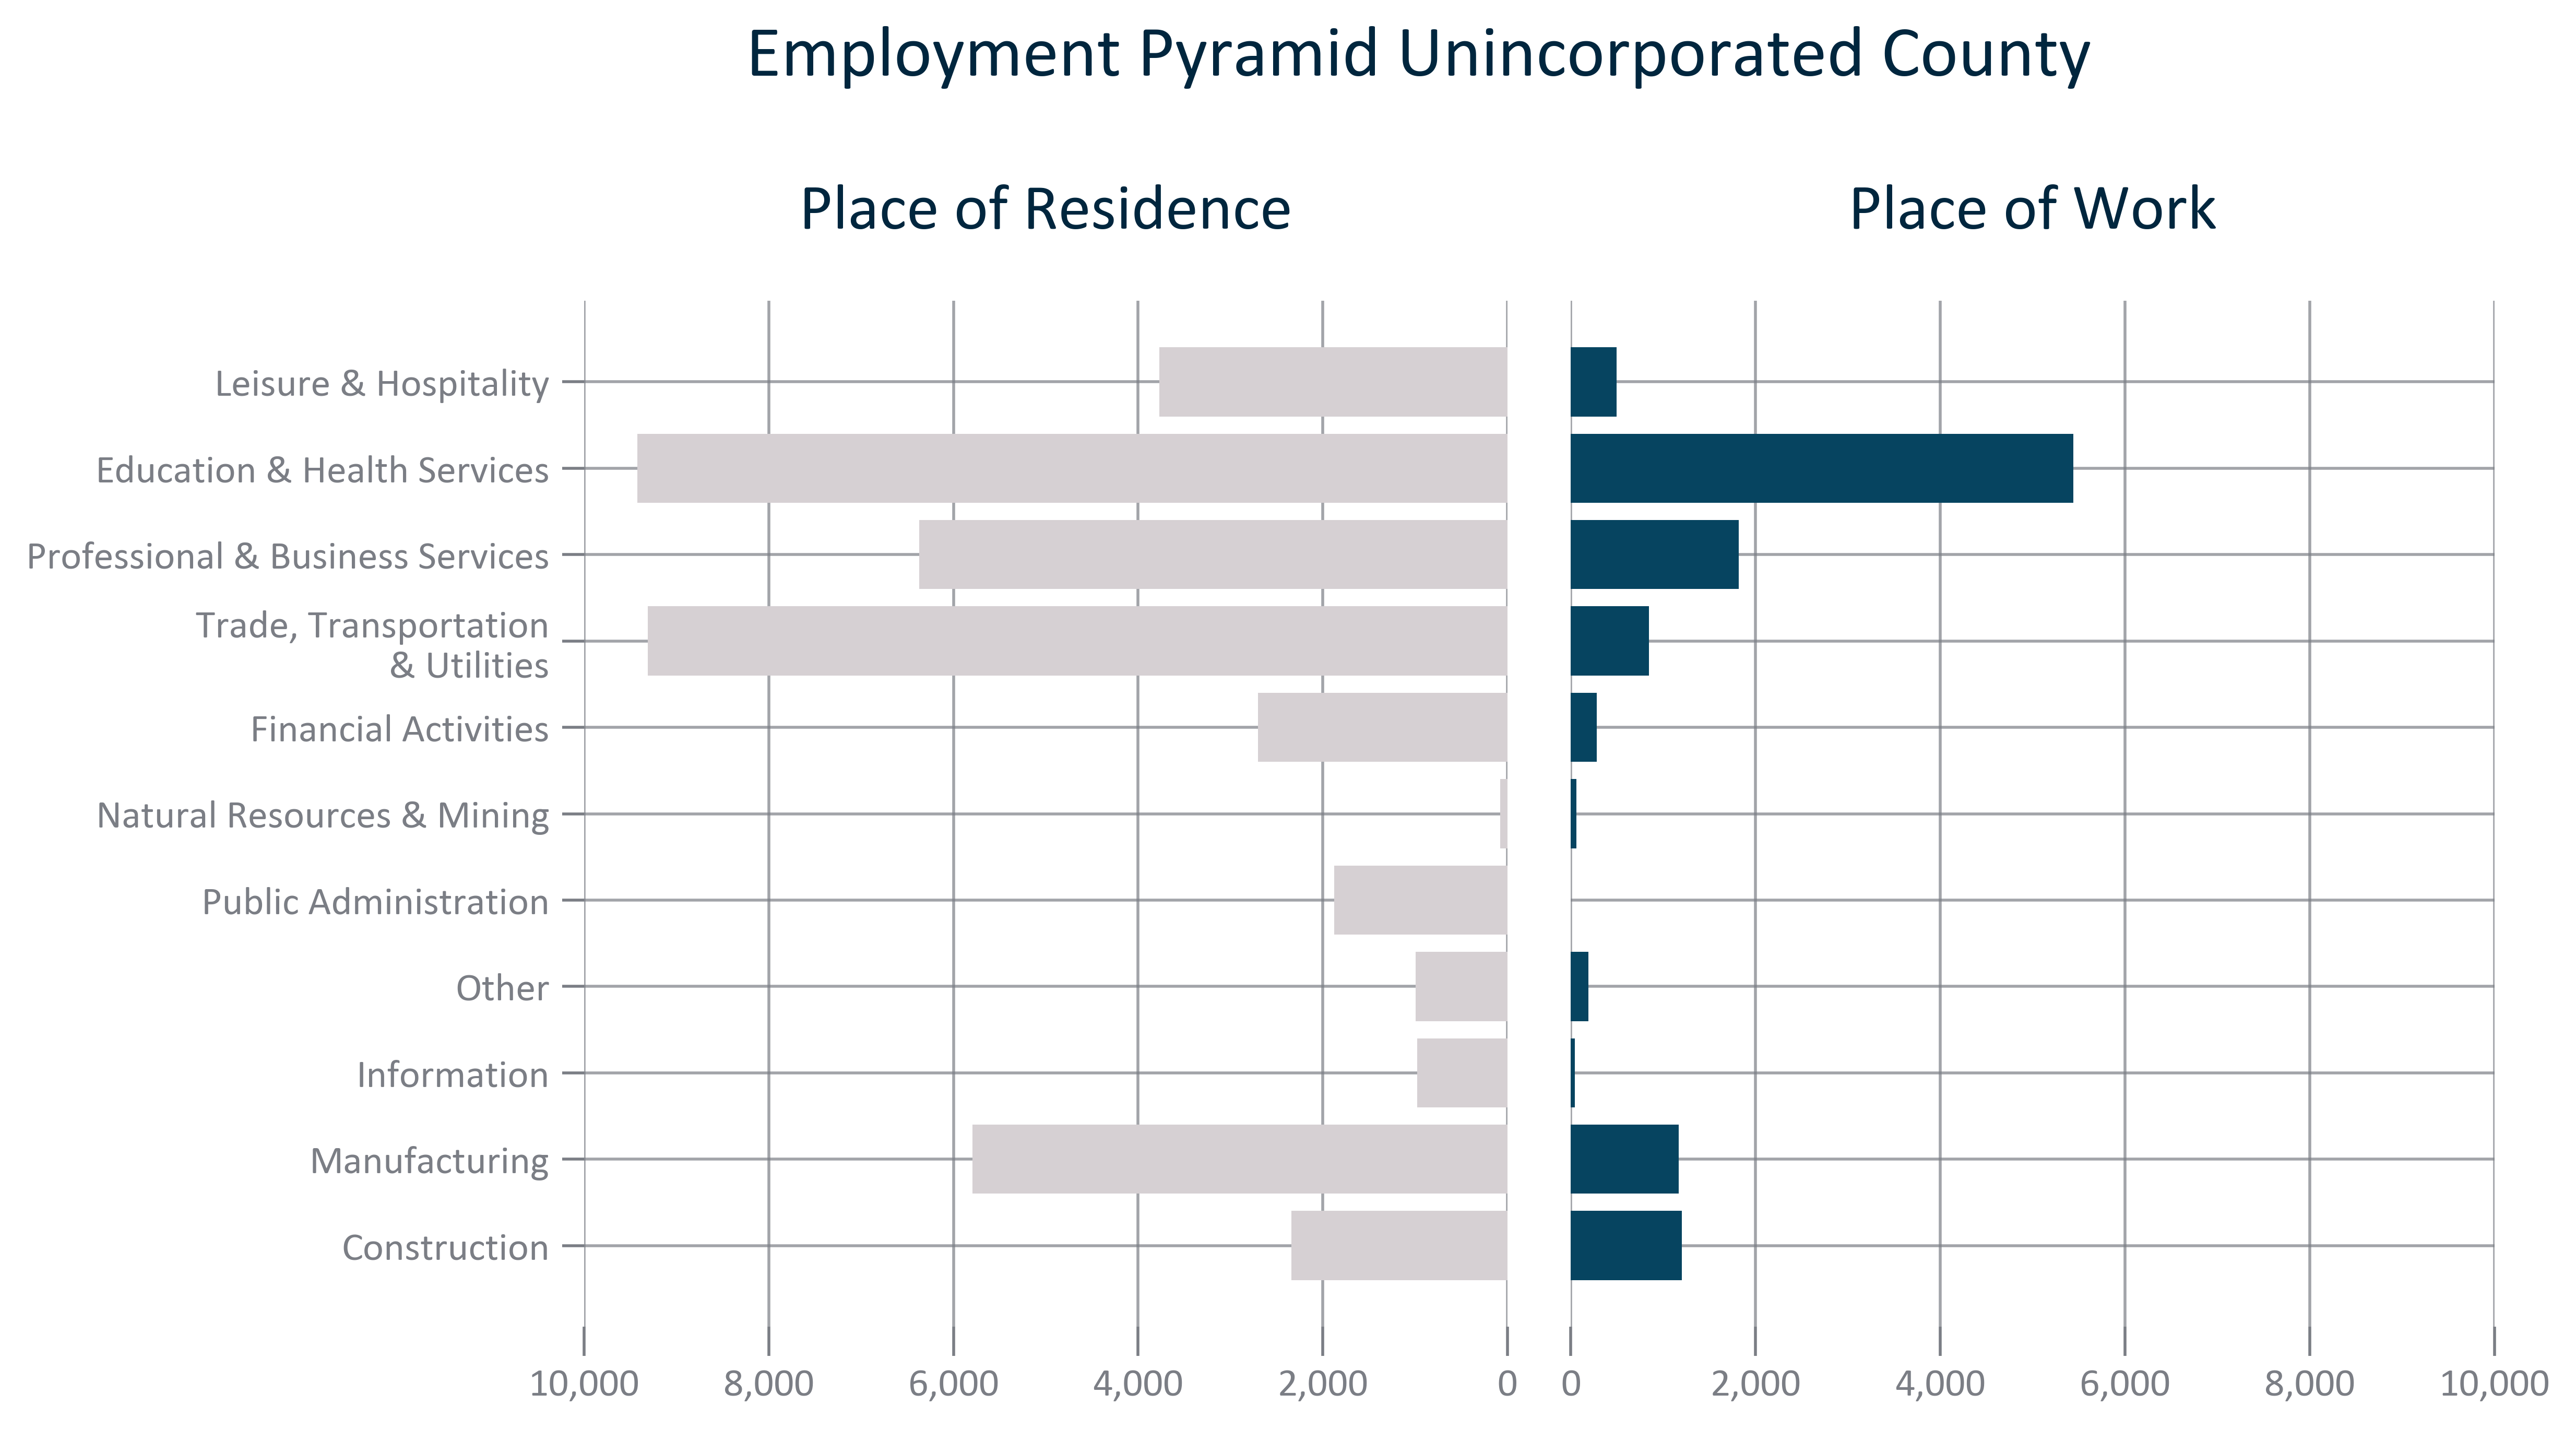

In [18]:
#EMP_PYRAMID
#PRIMARY GEO, POW and POR employment
title = 'Employment Pyramid Unincorporated County'
df_temp = ac.loc[ac['NAME'] == Unincorporated]
df_temp1 = df_temp[['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'WAC:NAICS:21Mining, Quarrying, Oil & Gas', 'WAC:NAICS:22Utilities',
                    'WAC:NAICS:23Construction', 'WAC:NAICS:31to33Manufacturing', 'WAC:NAICS:42Wholesale Trade', 'WAC:NAICS:44to45Retail Trade', 
                    'WAC:NAICS:48to49Transportation & Warehousing', 'WAC:NAICS:51Information', 'WAC:NAICS:52Finance & Insurance', 
                    'WAC:NAICS:53Real Estate & Rental & Leasing', 'WAC:NAICS:54Professional, Scientific, & Technical Services', 
                    'WAC:NAICS:55Management of Companies & Enterprises', 'WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                    'WAC:NAICS:61Educational Services', 'WAC:NAICS:62Healthcare & Social Assistance', 'WAC:NAICS:71Arts, Entertainment, & Recreation', 
                    'WAC:NAICS:72Accommodation & Food Services', 'WAC:NAICS:81Other Services (Except Public Administration)', 'WAC:NAICS:92Public Administration']]
df_temp1['Natural Resources & Mining'] = df_temp1['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting'] + df_temp1['WAC:NAICS:21Mining, Quarrying, Oil & Gas']
thelist = [df_temp1['WAC:NAICS:42Wholesale Trade'], df_temp1['WAC:NAICS:53Real Estate & Rental & Leasing']]
df_temp1['Financial Activities'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:52Finance & Insurance'], df_temp1['WAC:NAICS:44to45Retail Trade'], 
           df_temp1['WAC:NAICS:48to49Transportation & Warehousing'], df_temp1['WAC:NAICS:22Utilities']]
df_temp1['Trade, Transportation\n& Utilities'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:54Professional, Scientific, & Technical Services'], df_temp1['WAC:NAICS:55Management of Companies & Enterprises'], 
           df_temp1['WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services']]
df_temp1['Professional & Business Services'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:61Educational Services'], df_temp1['WAC:NAICS:62Healthcare & Social Assistance']]
df_temp1['Education & Health Services'] = sum(thelist)
thelist = [df_temp1['WAC:NAICS:71Arts, Entertainment, & Recreation'], df_temp1['WAC:NAICS:72Accommodation & Food Services']]
df_temp1['Leisure & Hospitality'] = sum(thelist)
df_temp1 = df_temp1.drop(columns = ['WAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'WAC:NAICS:21Mining, Quarrying, Oil & Gas', 
                                    'WAC:NAICS:42Wholesale Trade', 'WAC:NAICS:44to45Retail Trade', 'WAC:NAICS:22Utilities',
                                    'WAC:NAICS:48to49Transportation & Warehousing', 'WAC:NAICS:52Finance & Insurance', 
                                    'WAC:NAICS:53Real Estate & Rental & Leasing', 'WAC:NAICS:54Professional, Scientific, & Technical Services', 
                                    'WAC:NAICS:55Management of Companies & Enterprises', 
                                    'WAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                                    'WAC:NAICS:61Educational Services', 'WAC:NAICS:62Healthcare & Social Assistance', 
                                   'WAC:NAICS:71Arts, Entertainment, & Recreation', 'WAC:NAICS:72Accommodation & Food Services'])
df_temp1 = df_temp1.rename(columns = {'WAC:NAICS:23Construction': 'Construction', 
                                      'WAC:NAICS:31to33Manufacturing': 'Manufacturing',
                                      'WAC:NAICS:51Information': 'Information',   
                                      'WAC:NAICS:81Other Services (Except Public Administration)': 'Other', 
                                      'WAC:NAICS:92Public Administration': 'Public Administration'})
df_temp1_transp = df_temp1.transpose().reset_index()
df_temp1_transp.columns = ['Industry', 'Place of Work Employment']
df_temp2 = df_temp[['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'RAC:NAICS:21Mining, Quarrying, Oil & Gas', 'RAC:NAICS:22Utilities',
                    'RAC:NAICS:23Construction', 'RAC:NAICS:31to33Manufacturing', 'RAC:NAICS:42Wholesale Trade', 'RAC:NAICS:44to45Retail Trade', 
                    'RAC:NAICS:48to49Transportation & Warehousing', 'RAC:NAICS:51Information', 'RAC:NAICS:52Finance & Insurance', 
                    'RAC:NAICS:53Real Estate & Rental & Leasing', 'RAC:NAICS:54Professional, Scientific, & Technical Services', 
                    'RAC:NAICS:55Management of Companies & Enterprises', 'RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                    'RAC:NAICS:61Educational Services', 'RAC:NAICS:62Healthcare & Social Assistance', 'RAC:NAICS:71Arts, Entertainment, & Recreation', 
                    'RAC:NAICS:72Accommodation & Food Services', 'RAC:NAICS:81Other Services (Except Public Administration)', 'RAC:NAICS:92Public Administration']]
df_temp2['Natural Resources & Mining'] = df_temp2['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting'] + df_temp2['RAC:NAICS:21Mining, Quarrying, Oil & Gas']
thelist = [df_temp2['RAC:NAICS:42Wholesale Trade'], df_temp2['RAC:NAICS:53Real Estate & Rental & Leasing']]
df_temp2['Financial Activities'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:52Finance & Insurance'], df_temp2['RAC:NAICS:44to45Retail Trade'], 
           df_temp2['RAC:NAICS:48to49Transportation & Warehousing'], df_temp2['RAC:NAICS:22Utilities']]
df_temp2['Trade, Transportation\n& Utilities'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:54Professional, Scientific, & Technical Services'], df_temp2['RAC:NAICS:55Management of Companies & Enterprises'], 
           df_temp2['RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services']]
df_temp2['Professional & Business Services'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:61Educational Services'], df_temp2['RAC:NAICS:62Healthcare & Social Assistance']]
df_temp2['Education & Health Services'] = sum(thelist)
thelist = [df_temp2['RAC:NAICS:71Arts, Entertainment, & Recreation'], df_temp2['RAC:NAICS:72Accommodation & Food Services']]
df_temp2['Leisure & Hospitality'] = sum(thelist)
df_temp2 = df_temp2.drop(columns = ['RAC:NAICS:11Agriculture, Forestry, Fishing & Hunting', 'RAC:NAICS:21Mining, Quarrying, Oil & Gas', 
                                    'RAC:NAICS:42Wholesale Trade', 'RAC:NAICS:44to45Retail Trade', 'RAC:NAICS:22Utilities',
                                    'RAC:NAICS:48to49Transportation & Warehousing', 'RAC:NAICS:52Finance & Insurance', 
                                    'RAC:NAICS:53Real Estate & Rental & Leasing', 'RAC:NAICS:54Professional, Scientific, & Technical Services', 
                                    'RAC:NAICS:55Management of Companies & Enterprises', 
                                    'RAC:NAICS:56Administrative & Support & Waste Management & Remediation Services', 
                                    'RAC:NAICS:61Educational Services', 'RAC:NAICS:62Healthcare & Social Assistance', 
                                   'RAC:NAICS:71Arts, Entertainment, & Recreation', 'RAC:NAICS:72Accommodation & Food Services'])
df_temp2 = df_temp2.rename(columns = {'RAC:NAICS:23Construction': 'Construction', 
                                      'RAC:NAICS:31to33Manufacturing': 'Manufacturing',
                                      'RAC:NAICS:51Information': 'Information',   
                                      'RAC:NAICS:81Other Services (Except Public Administration)': 'Other', 
                                      'RAC:NAICS:92Public Administration': 'Public Administration'})
df_temp2_transp = df_temp2.transpose().reset_index()
df_temp2_transp.columns = ['Industry', 'Place of Residence Employment']
df_temp = df_temp1_transp.merge(df_temp2_transp, on = 'Industry')
#initiate figures and set parameters
fig, axes = plt.subplots(ncols=2, sharey=True)
index = df_temp['Industry']
indices = [df_temp['Industry'], df_temp['Industry']]
column0 = df_temp['Place of Residence Employment']
column1 = df_temp['Place of Work Employment']
columns = [df_temp['Place of Residence Employment'], df_temp['Place of Work Employment']]
axes[0].barh(index, column0, color = C2, align='center')
axes[0].set_title('Place of Residence')
axes[0].set_xlim(0, 10000)
axes[0].grid()
axes[1].grid()
axes[0].invert_xaxis() 
axes[0].xaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #x axis formatting
axes[1].xaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #x axis formatting
axes[1].yaxis.set_ticks_position('none')
axes[1].barh(index, column1, align='center')
axes[1].set_title('Place of Work')
axes[1].set_xlim(0, 10000)
#title entire figure
fig.text(0.55, 1.05, title, fontsize = BIGGEST_SIZE, ha='center')
#display and save
fig.savefig('../Figures/EMP_pyramid_primarygeounincorporated_powporemploymentpyramid_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_pyramid_primarygeounincorporated_powporemploymentpyramid_2019.png', bbox_inches='tight')
with open('../Figures/EMP_pyramid_primarygeounincorporated_powporemploymentpyramid_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

In [54]:
#LEHD Origin Destination
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [LEHD_OD_ACS5_2019]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)

cols = list(data.columns)
cols.remove('Home County')
cols.remove('Home Incorporated')
cols.remove('Home Place')
cols.remove('Work County')
cols.remove('Work Incorporated')
cols.remove('Work Place')
cols.remove('HOMEGEO_ID')
cols.remove('WORKGEO_ID')
data[cols] = data[cols].astype(float)
od = data

In [55]:
od = od.drop(columns = ['Home Incorporated', 'Work Incorporated'])

In [56]:
od.head(3)

,WORKGEO_ID,HOMEGEO_ID,Total Jobs,Age:Workers 29 or Younger,Age:Workers 30 to 54,Age:Workers 55 Older,Earnings:1250mo or Less,Earnings:1251 to 3333mo,Earnings:Greater Than 3333mo,Sector:Goods Producing,"Sector:Trade, Transportation & Utilities",Sector:All Other Services,Home County,Home Place,Work County,Work Place
0,470010201001000,470010201001063,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,"Anderson County, Tennessee","Oak Ridge city, Tennessee","Anderson County, Tennessee","Oak Ridge city, Tennessee"
1,470010201001000,470010201002013,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"Anderson County, Tennessee","Oak Ridge city, Tennessee","Anderson County, Tennessee","Oak Ridge city, Tennessee"
2,470010201001000,470010201002017,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"Anderson County, Tennessee","Oak Ridge city, Tennessee","Anderson County, Tennessee","Oak Ridge city, Tennessee"


In [57]:
od = od.set_index('Home County').transpose()
od = od.rename(columns = namestocommon).transpose().reset_index(drop = False)

In [58]:
od = od.set_index('Work County').transpose()
od = od.rename(columns = namestocommon).transpose().reset_index(drop = False)

In [59]:
od = od.set_index('Home Place').transpose()
od = od.rename(columns = namestocommon).transpose().reset_index(drop = False)

In [60]:
od = od.set_index('Work Place').transpose()
od = od.rename(columns = namestocommon).transpose().reset_index(drop = False)

In [61]:
homecounty = od.loc[od['Home County'] == 'Rutherford County'].reset_index(drop = True)
homecounty['Home Place'] = homecounty['Home Place'].fillna('None')
homeunincorporatedcounty = homecounty.loc[homecounty['Home Place'] == 'None']
#homecounty.head()
homeunincorporatedcounty.head(2)

,Work Place,Home Place,Work County,Home County,WORKGEO_ID,HOMEGEO_ID,Total Jobs,Age:Workers 29 or Younger,Age:Workers 30 to 54,Age:Workers 55 Older,Earnings:1250mo or Less,Earnings:1251 to 3333mo,Earnings:Greater Than 3333mo,Sector:Goods Producing,"Sector:Trade, Transportation & Utilities",Sector:All Other Services
1,"Oak Ridge city, Tennessee",None,"Anderson County, Tennessee",Rutherford County,470010201001005,471490405012002,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,"Oak Ridge city, Tennessee",None,"Anderson County, Tennessee",Rutherford County,470010201001022,471490407021030,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
homeunincorporatedcounty['Home Place'].value_counts()

None    38275
Name: Home Place, dtype: int64

In [63]:
#Top Counties
totaljobs = sum(homeunincorporatedcounty['Total Jobs'])
county = homeunincorporatedcounty.drop(columns = ['WORKGEO_ID', 'HOMEGEO_ID', 'Home County', 'Home Place', 'Work Place'])
county = county.groupby('Work County').sum()
county['Percent of Resident Workforce'] = percent(county['Total Jobs'], totaljobs)

In [64]:
county.head()

,Total Jobs,Age:Workers 29 or Younger,Age:Workers 30 to 54,Age:Workers 55 Older,Earnings:1250mo or Less,Earnings:1251 to 3333mo,Earnings:Greater Than 3333mo,Sector:Goods Producing,"Sector:Trade, Transportation & Utilities",Sector:All Other Services,Percent of Resident Workforce
Work County,,,,,,,,,,,
"Anderson County, Tennessee",38.0,7.0,22.0,9.0,5.0,8.0,25.0,6.0,4.0,28.0,0.082988
"Bedford County, Tennessee",525.0,94.0,320.0,111.0,64.0,146.0,315.0,148.0,165.0,212.0,1.146539
"Benton County, Tennessee",10.0,1.0,7.0,2.0,1.0,6.0,3.0,1.0,5.0,4.0,0.021839
"Bledsoe County, Tennessee",3.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0,0.006552
"Blount County, Tennessee",74.0,15.0,37.0,22.0,15.0,16.0,43.0,12.0,27.0,35.0,0.161607


In [65]:
#Top Places
totaljobs = sum(homeunincorporatedcounty['Total Jobs'])
place = homeunincorporatedcounty.drop(columns = ['WORKGEO_ID', 'HOMEGEO_ID', 'Home County', 'Home Place', 'Work County'])
place = place.groupby('Work Place').sum()
place['Percent of Resident Workforce'] = percent(place['Total Jobs'], totaljobs)

In [84]:
place2 = homeunincorporatedcounty.drop(columns = ['WORKGEO_ID', 'HOMEGEO_ID', 'Home County', 'Home Place'])
place2 = place2.loc[place2['Work County'] == 'Rutherford County']
place2['Work Place'] = place2['Work Place'].fillna('None')
place2 = place2.loc[place2['Work Place'] == 'None']
place2 = place2.drop(columns = 'Work County')
place2 = place2.groupby('Work Place').sum()
place2['Percent of Resident Workforce'] = percent(place2['Total Jobs'], totaljobs)
place2

,Total Jobs,Age:Workers 29 or Younger,Age:Workers 30 to 54,Age:Workers 55 Older,Earnings:1250mo or Less,Earnings:1251 to 3333mo,Earnings:Greater Than 3333mo,Sector:Goods Producing,"Sector:Trade, Transportation & Utilities",Sector:All Other Services,Percent of Resident Workforce
Work Place,,,,,,,,,,,
None,2516.0,358.0,1467.0,691.0,288.0,669.0,1559.0,619.0,217.0,1680.0,5.494649


In [66]:
region = county.transpose()
cols = region.columns
region[cols] = region[cols].astype(float)
region.head()

Work County,"Anderson County, Tennessee","Bedford County, Tennessee","Benton County, Tennessee","Bledsoe County, Tennessee","Blount County, Tennessee","Bradley County, Tennessee","Campbell County, Tennessee","Cannon County, Tennessee","Carroll County, Tennessee","Carter County, Tennessee",Cheatham County,"Chester County, Tennessee","Claiborne County, Tennessee","Clay County, Tennessee","Cocke County, Tennessee","Coffee County, Tennessee","Cumberland County, Tennessee",Davidson County,"DeKalb County, Tennessee","Decatur County, Tennessee",Dickson County,"Dyer County, Tennessee","Fayette County, Tennessee","Fentress County, Tennessee","Franklin County, Tennessee","Gibson County, Tennessee","Giles County, Tennessee","Grainger County, Tennessee","Greene County, Tennessee","Grundy County, Tennessee","Hamblen County, Tennessee","Hamilton County, Tennessee","Hardeman County, Tennessee","Hardin County, Tennessee","Henderson County, Tennessee","Henry County, Tennessee","Hickman County, Tennessee",Humphreys County,"Jackson County, Tennessee","Jefferson County, Tennessee","Johnson County, Tennessee","Knox County, Tennessee","Lake County, Tennessee","Lauderdale County, Tennessee","Lawrence County, Tennessee","Lewis County, Tennessee","Lincoln County, Tennessee","Loudon County, Tennessee",Macon County,"Madison County, Tennessee","Marion County, Tennessee","Marshall County, Tennessee",Maury County,"McMinn County, Tennessee","McNairy County, Tennessee","Monroe County, Tennessee",Montgomery County,"Moore County, Tennessee","Morgan County, Tennessee","Obion County, Tennessee","Overton County, Tennessee","Perry County, Tennessee","Polk County, Tennessee","Putnam County, Tennessee","Rhea County, Tennessee","Roane County, Tennessee",Robertson County,Rutherford County,"Scott County, Tennessee","Sequatchie County, Tennessee","Sevier County, Tennessee","Shelby County, Tennessee","Smith County, Tennessee",Stewart County,"Sullivan County, Tennessee",Sumner County,"Tipton County, Tennessee",Trousdale County,"Unicoi County, Tennessee","Union County, Tennessee","Warren County, Tennessee","Washington County, Tennessee","Wayne County, Tennessee","Weakley County, Tennessee","White County, Tennessee",Williamson County,Wilson County
Total Jobs,38.0,525.0,10.0,3.0,74.0,100.0,3.0,121.0,10.0,8.0,36.0,4.0,4.0,1.0,5.0,463.0,26.0,12333.0,73.0,8.0,80.0,16.0,9.0,4.0,82.0,13.0,40.0,1.0,12.0,5.0,27.0,490.0,10.0,12.0,12.0,13.0,5.0,16.0,2.0,1.0,2.0,492.0,2.0,4.0,34.0,6.0,40.0,13.0,28.0,92.0,9.0,155.0,390.0,23.0,1.0,9.0,191.0,36.0,5.0,3.0,4.0,3.0,2.0,94.0,8.0,7.0,114.0,21662.0,3.0,1.0,25.0,921.0,31.0,10.0,66.0,495.0,12.0,10.0,1.0,1.0,166.0,36.0,9.0,40.0,19.0,4375.0,1445.0
Age:Workers 29 or Younger,7.0,94.0,1.0,0.0,15.0,47.0,0.0,26.0,1.0,0.0,7.0,2.0,2.0,0.0,3.0,116.0,7.0,2556.0,25.0,0.0,27.0,5.0,1.0,3.0,30.0,0.0,12.0,0.0,3.0,1.0,7.0,160.0,1.0,1.0,2.0,5.0,1.0,2.0,0.0,0.0,2.0,132.0,0.0,0.0,12.0,0.0,15.0,1.0,7.0,20.0,4.0,35.0,104.0,7.0,0.0,3.0,73.0,2.0,0.0,0.0,0.0,2.0,0.0,40.0,2.0,5.0,31.0,4541.0,0.0,0.0,7.0,177.0,8.0,1.0,12.0,173.0,3.0,3.0,0.0,0.0,26.0,12.0,2.0,4.0,9.0,1030.0,395.0
Age:Workers 30 to 54,22.0,320.0,7.0,2.0,37.0,40.0,1.0,68.0,5.0,6.0,25.0,2.0,2.0,1.0,2.0,240.0,13.0,7387.0,33.0,4.0,43.0,8.0,7.0,1.0,38.0,8.0,24.0,1.0,4.0,3.0,11.0,247.0,6.0,7.0,7.0,7.0,3.0,10.0,1.0,1.0,0.0,263.0,1.0,2.0,13.0,4.0,18.0,10.0,12.0,52.0,1.0,78.0,203.0,9.0,0.0,3.0,84.0,25.0,2.0,2.0,4.0,1.0,1.0,39.0,4.0,2.0,65.0,12679.0,3.0,1.0,13.0,547.0,15.0,7.0,34.0,236.0,7.0,6.0,1.0,1.0,109.0,19.0,6.0,26.0,6.0,2656.0,785.0
Age:Workers 55 Older,9.0,111.0,2.0,1.0,22.0,13.0,2.0,27.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,107.0,6.0,2390.0,15.0,4.0,10.0,3.0,1.0,0.0,14.0,5.0,4.0,0.0,5.0,1.0,9.0,83.0,3.0,4.0,3.0,1.0,1.0,4.0,1.0,0.0,0.0,97.0,1.0,2.0,9.0,2.0,7.0,2.0,9.0,20.0,4.0,42.0,83.0,7.0,1.0,3.0,34.0,9.0,3.0,1.0,0.0,0.0,1.0,15.0,2.0,0.0,18.0,4442.0,0.0,0.0,5.0,197.0,8.0,2.0,20.0,86.0,2.0,1.0,0.0,0.0,31.0,5.0,1.0,10.0,4.0,689.0,265.0
Earnings:1250mo or Less,5.0,64.0,1.0,0.0,15.0,43.0,0.0,18.0,2.0,1.0,6.0,1.0,2.0,0.0

In [67]:
region = county.transpose()
thelist = [region['Cheatham County'], region['Davidson County'], region['Dickson County'], #region['Houston County'], 
           region['Humphreys County'], 
           #region['Maury County'], 
           region['Montgomery County'], region['Robertson County'], region['Rutherford County'], 
           region['Stewart County'], region['Sumner County'], region['Trousdale County'], 
           region['Williamson County'], region['Wilson County']]
region['GNRC'] = sum(thelist)
region = region.drop(columns =['Cheatham County', 'Davidson County', 'Dickson County', #'Houston County', 
                               'Humphreys County', 'Maury County', 'Montgomery County', 
                               'Robertson County', 'Rutherford County', 'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County'])
region = region.transpose()

In [68]:
county['Age%:Workers 29 or Younger'] = percent(county['Age:Workers 29 or Younger'], county['Total Jobs'])
county['Age%:All Workers 29 or Younger'] = percent(county['Age:Workers 29 or Younger'], sum(county['Age:Workers 29 or Younger']))
county['Age%:Workers 30 to 54'] = percent(county['Age:Workers 30 to 54'], county['Total Jobs'])
county['Age%:All Workers 30 to 54'] = percent(county['Age:Workers 30 to 54'], sum(county['Age:Workers 30 to 54']))
county['Age%:Workers 55 Older'] = percent(county['Age:Workers 55 Older'], county['Total Jobs'])
county['Age%:All Workers 55 Older'] = percent(county['Age:Workers 55 Older'], sum(county['Age:Workers 55 Older']))
county['Earnings%:1250mo or Less'] = percent(county['Earnings:1250mo or Less'], county['Total Jobs'])
county['Earnings%:All Workers 1250mo or Less'] = percent(county['Earnings:1250mo or Less'], sum(county['Earnings:1250mo or Less']))
county['Earnings%:1251 to 3333mo'] = percent(county['Earnings:1251 to 3333mo'], county['Total Jobs'])
county['Earnings%:All Workers 1251 to 3333mo'] = percent(county['Earnings:1251 to 3333mo'], sum(county['Earnings:1251 to 3333mo']))
county['Earnings%:Greater Than 3333mo'] = percent(county['Earnings:Greater Than 3333mo'], county['Total Jobs'])
county['Earnings%:All Workers 1251 to 3333mo'] = percent(county['Earnings:1251 to 3333mo'], sum(county['Earnings:1251 to 3333mo']))
county['Sector%:Goods Producing'] = percent(county['Sector:Goods Producing'], county['Total Jobs'])
county['Sector%:All Workers Goods Producing'] = percent(county['Sector:Goods Producing'], sum(county['Sector:Goods Producing']))
county['Sector%:Trade, Transportation & Utilities'] = percent(county['Sector:Trade, Transportation & Utilities'], county['Total Jobs'])
county['Sector%:All Workers Trade, Transportation & Utilities'] = percent(county['Sector:Trade, Transportation & Utilities'], 
                                                                          sum(county['Sector:Trade, Transportation & Utilities']))
county['Sector%:All Other Services'] = percent(county['Sector:All Other Services'], county['Total Jobs'])
county['Sector%:All Workers All Other Services'] = percent(county['Sector:All Other Services'], sum(county['Sector:All Other Services']))
#same for region versus elsewhere
region['Age%:Workers 29 or Younger'] = percent(region['Age:Workers 29 or Younger'], region['Total Jobs'])
region['Age%:All Workers 29 or Younger'] = percent(region['Age:Workers 29 or Younger'], sum(region['Age:Workers 29 or Younger']))
region['Age%:Workers 30 to 54'] = percent(region['Age:Workers 30 to 54'], region['Total Jobs'])
region['Age%:All Workers 30 to 54'] = percent(region['Age:Workers 30 to 54'], sum(region['Age:Workers 30 to 54']))
region['Age%:Workers 55 Older'] = percent(region['Age:Workers 55 Older'], region['Total Jobs'])
region['Age%:All Workers 55 Older'] = percent(region['Age:Workers 55 Older'], sum(region['Age:Workers 55 Older']))
region['Earnings%:1250mo or Less'] = percent(region['Earnings:1250mo or Less'], region['Total Jobs'])
region['Earnings%:All Workers 1250mo or Less'] = percent(region['Earnings:1250mo or Less'], sum(region['Earnings:1250mo or Less']))
region['Earnings%:1251 to 3333mo'] = percent(region['Earnings:1251 to 3333mo'], region['Total Jobs'])
region['Earnings%:All Workers 1251 to 3333mo'] = percent(region['Earnings:1251 to 3333mo'], sum(region['Earnings:1251 to 3333mo']))
region['Earnings%:Greater Than 3333mo'] = percent(region['Earnings:Greater Than 3333mo'], region['Total Jobs'])
region['Earnings%:All Workers 1251 to 3333mo'] = percent(region['Earnings:1251 to 3333mo'], sum(region['Earnings:1251 to 3333mo']))
region['Sector%:Goods Producing'] = percent(region['Sector:Goods Producing'], region['Total Jobs'])
region['Sector%:All Workers Goods Producing'] = percent(region['Sector:Goods Producing'], sum(region['Sector:Goods Producing']))
region['Sector%:Trade, Transportation & Utilities'] = percent(region['Sector:Trade, Transportation & Utilities'], region['Total Jobs'])
region['Sector%:All Workers Trade, Transportation & Utilities'] = percent(region['Sector:Trade, Transportation & Utilities'], 
                                                                          sum(region['Sector:Trade, Transportation & Utilities']))
region['Sector%:All Other Services'] = percent(region['Sector:All Other Services'], region['Total Jobs'])
region['Sector%:All Workers All Other Services'] = percent(region['Sector:All Other Services'], sum(region['Sector:All Other Services']))
#same for place
place['Age%:Workers 29 or Younger'] = percent(place['Age:Workers 29 or Younger'], place['Total Jobs'])
place['Age%:All Workers 29 or Younger'] = percent(place['Age:Workers 29 or Younger'], sum(place['Age:Workers 29 or Younger']))
place['Age%:Workers 30 to 54'] = percent(place['Age:Workers 30 to 54'], place['Total Jobs'])
place['Age%:All Workers 30 to 54'] = percent(place['Age:Workers 30 to 54'], sum(place['Age:Workers 30 to 54']))
place['Age%:Workers 55 Older'] = percent(place['Age:Workers 55 Older'], place['Total Jobs'])
place['Age%:All Workers 55 Older'] = percent(place['Age:Workers 55 Older'], sum(place['Age:Workers 55 Older']))
place['Earnings%:1250mo or Less'] = percent(place['Earnings:1250mo or Less'], place['Total Jobs'])
place['Earnings%:All Workers 1250mo or Less'] = percent(place['Earnings:1250mo or Less'], sum(place['Earnings:1250mo or Less']))
place['Earnings%:1251 to 3333mo'] = percent(place['Earnings:1251 to 3333mo'], place['Total Jobs'])
place['Earnings%:All Workers 1251 to 3333mo'] = percent(place['Earnings:1251 to 3333mo'], sum(place['Earnings:1251 to 3333mo']))
place['Earnings%:Greater Than 3333mo'] = percent(place['Earnings:Greater Than 3333mo'], place['Total Jobs'])
place['Earnings%:All Workers 1251 to 3333mo'] = percent(place['Earnings:1251 to 3333mo'], sum(place['Earnings:1251 to 3333mo']))
place['Sector%:Goods Producing'] = percent(place['Sector:Goods Producing'], place['Total Jobs'])
place['Sector%:All Workers Goods Producing'] = percent(place['Sector:Goods Producing'], sum(place['Sector:Goods Producing']))
place['Sector%:Trade, Transportation & Utilities'] = percent(place['Sector:Trade, Transportation & Utilities'], place['Total Jobs'])
place['Sector%:All Workers Trade, Transportation & Utilities'] = percent(place['Sector:Trade, Transportation & Utilities'], 
                                                                          sum(place['Sector:Trade, Transportation & Utilities']))
place['Sector%:All Other Services'] = percent(place['Sector:All Other Services'], place['Total Jobs'])
place['Sector%:All Workers All Other Services'] = percent(place['Sector:All Other Services'], sum(place['Sector:All Other Services']))

In [69]:
county = county.reset_index(drop = False)
region = region.reset_index(drop = False)
place = place.reset_index(drop = False)

In [71]:
place.head()

,Work Place,Total Jobs,Age:Workers 29 or Younger,Age:Workers 30 to 54,Age:Workers 55 Older,Earnings:1250mo or Less,Earnings:1251 to 3333mo,Earnings:Greater Than 3333mo,Sector:Goods Producing,"Sector:Trade, Transportation & Utilities",Sector:All Other Services,Percent of Resident Workforce,Age%:Workers 29 or Younger,Age%:All Workers 29 or Younger,Age%:Workers 30 to 54,Age%:All Workers 30 to 54,Age%:Workers 55 Older,Age%:All Workers 55 Older,Earnings%:1250mo or Less,Earnings%:All Workers 1250mo or Less,Earnings%:1251 to 3333mo,Earnings%:All Workers 1251 to 3333mo,Earnings%:Greater Than 3333mo,Sector%:Goods Producing,Sector%:All Workers Goods Producing,"Sector%:Trade, Transportation & Utilities","Sector%:All Workers Trade, Transportation & Utilities",Sector%:All Other Services,Sector%:All Workers All Other Services
0,"Alcoa city, Tennessee",34.0,9.0,12.0,13.0,10.0,6.0,18.0,0.0,15.0,19.0,0.074252,26.470588,0.095990,35.294118,0.049178,38.235294,0.162176,29.411765,0.165728,17.647059,0.054103,52.941176,0.0,0.000000,44.117647,0.163203,55.882353,0.075882
1,"Alexandria town, Tennessee",2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.004368,50.000000,0.010666,50.000000,0.004098,0.000000,0.000000,0.000000,0.000000,50.000000,0.009017,50.000000,50.0,0.013222,0.000000,0.000000,50.000000,0.003994
2,"Algood city, Tennessee",7.0,4.0,2.0,1.0,4.0,1.0,2.0,0.0,3.0,4.0,0.015287,57.142857,0.042662,28.571429,0.008196,14.285714,0.012475,57.142857,0.066291,14.285714,0.009017,28.571429,0.0,0.000000,42.857143,0.032641,57.142857,0.015975
3,"Altamont town, Tennessee",3.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,0.006552,0.000000,0.000000,100.000000,0.012295,0.000000,0.000000,66.666667,0.033146,0.000000,0.000000,33.333333,0.0,0.000000,100.000000,0.032641,0.000000,0.000000
4,"Ardmore city, Tennessee",6.0,2.0,4.0,0.0,1.0,1.0,4.0,0.0,2.0,4.0,0.013103,33.333333,0.021331,66.666667,0.016393,0.000000,0.000000,16.666667,0.016573,16.666667,0.009017,66.666667,0.0,0.000000,33.333333,0.021760,66.666667,0.015975


In [87]:
thing = place2['Percent of Resident Workforce'].reset_index(drop = True)
note = (str(thing) + "This is the percent of workers living in the unincorporated county that work in the unincorporated county.")
with open('../Figures/EMP_text_primarygeo_liveandworkinprimarygeo_2019.txt', 'w') as text_file:
    text_file.write(note)

In [88]:
note

'0    5.494649\nName: Percent of Resident Workforce, dtype: float64This is the percent of workers living in the unincorporated county that work in the unincorporated county.'

In [89]:
thing = county.loc[county['Work County'] == Primary]
thing = thing['Percent of Resident Workforce'].reset_index(drop = True)
note = (str(thing) + "This is the percent of workers living in the unincorporated county that work in the county.")
with open('../Figures/EMP_text_primarygeo_liveinprimarygeoandworkincounty_2019.txt', 'w') as text_file:
    text_file.write(note)

In [90]:
note

'0    47.307272\nName: Percent of Resident Workforce, dtype: float64This is the percent of workers living in the unincorporated county that work in the county.'

In [91]:
thing = region.loc[region['Work County'] == 'GNRC']
thing = thing['Percent of Resident Workforce'].reset_index(drop = True)
note = (str(thing) + "This is the percent of workers living in the unincorporated county that work in the 13 county region.")
with open('../Figures/EMP_text_primarygeo_liveinprimarygeoandworkinregion_2019.txt', 'w') as text_file:
    text_file.write(note)

In [92]:
note

'0    89.030356\nName: Percent of Resident Workforce, dtype: float64This is the percent of workers living in the unincorporated county that work in the 13 county region.'

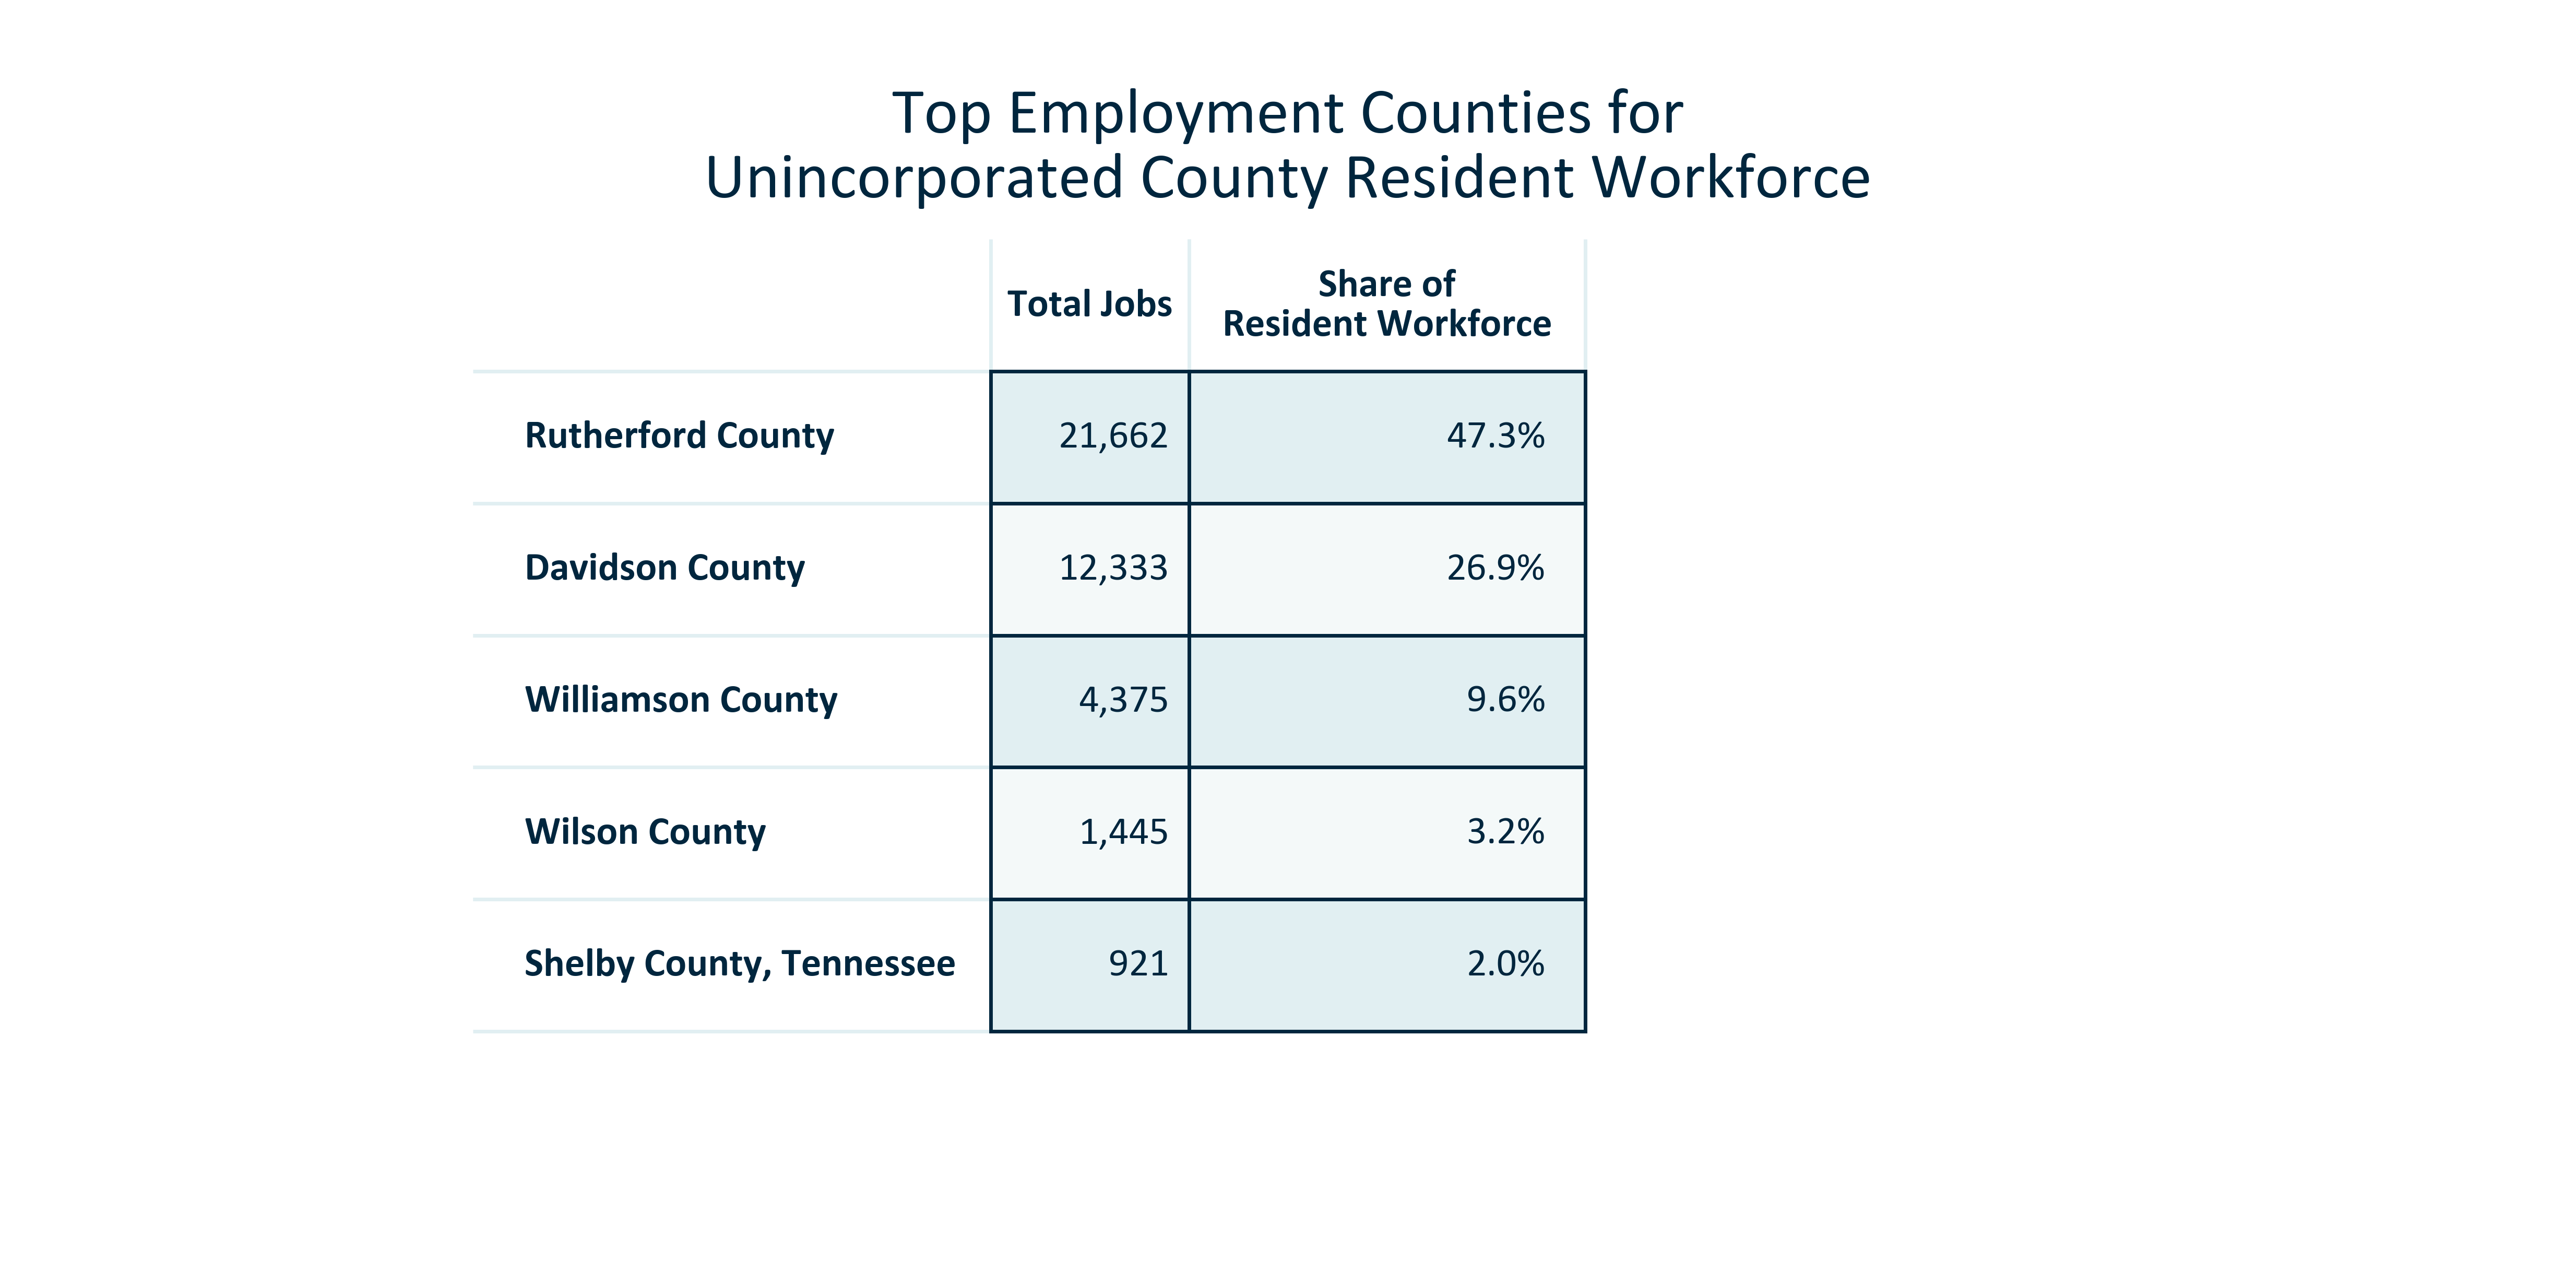

In [94]:
#top 5 counties
title = 'Top Employment Counties for\nUnincorporated County Resident Workforce'
df_temp = county.sort_values(by = 'Total Jobs', ascending = False)[:5].set_index('Work County')
df_temp = df_temp[['Total Jobs', 'Percent of Resident Workforce']]
df_temp.update(df_temp[['Percent of Resident Workforce']].applymap('{:,.1f}%'.format))
df_temp.update(df_temp[['Total Jobs']].applymap('{:,.0f}'.format))
df_temp = df_temp.rename(columns = {'Percent of Resident Workforce': 'Share of\nResident Workforce'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.8)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcounties_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcounties_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentcounties_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

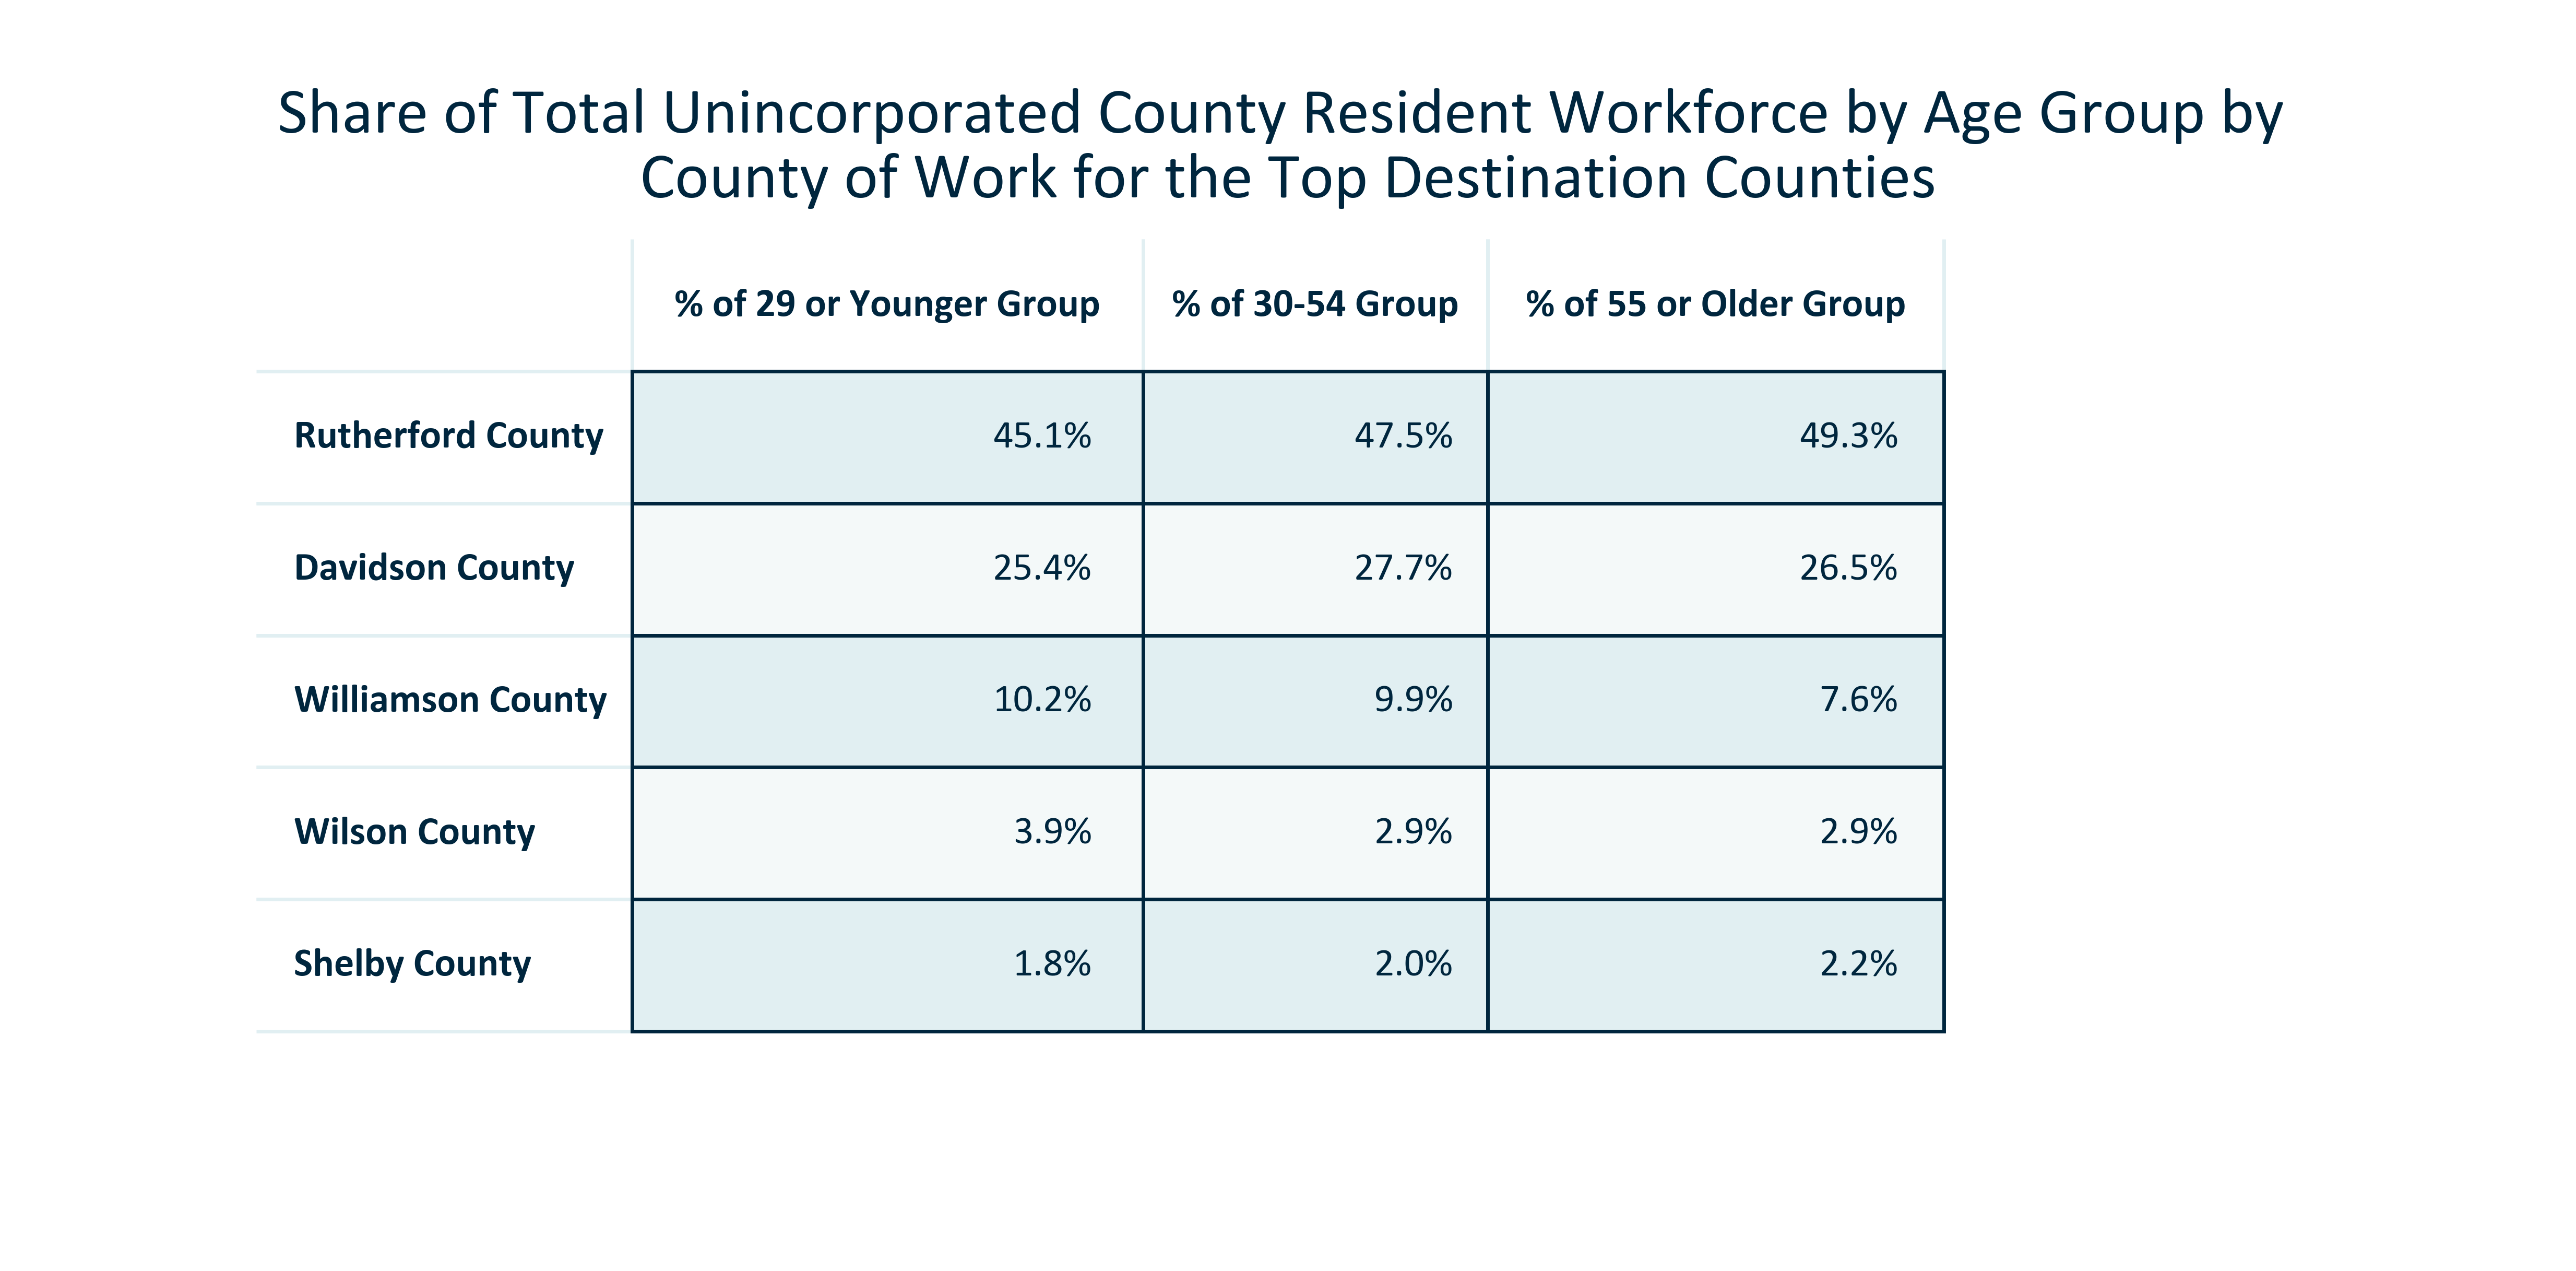

In [95]:
title = 'Share of Total Unincorporated County Resident Workforce by Age Group by \nCounty of Work for the Top Destination Counties'
df_temp = county.sort_values(by = 'Total Jobs', ascending = False)[:5]
df_temp = df_temp.replace({'Shelby County, Tennessee': 'Shelby County'})
df_temp.set_index('Work County', inplace = True)
df_temp = df_temp[[#'Age:Workers 29 or Younger',
                   #'Age%:Workers 29 or Younger', 
                   'Age%:All Workers 29 or Younger', 
                   #'Age:Workers 30 to 54',
                   #'Age%:Workers 30 to 54', 
                   'Age%:All Workers 30 to 54', 
                   #'Age:Workers 55 Older',
                   #'Age%:Workers 55 Older', 
                   'Age%:All Workers 55 Older']]
#df_temp.update(df_temp[['Age:Workers 29 or Younger', 'Age:Workers 30 to 54', 'Age:Workers 55 Older']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[[#'Age%:Workers 29 or Younger', 
                        'Age%:All Workers 29 or Younger', 
                        #'Age%:Workers 30 to 54', 
                        'Age%:All Workers 30 to 54', 
                        #'Age%:Workers 55 Older', 
                        'Age%:All Workers 55 Older']].applymap('{:,.1f}%'.format))
df_temp = df_temp.rename(columns = {#'Age:Workers 29 or Younger': '29 or Younger', 
                                    #'Age%:Workers 29 or Younger': '% of Commuters 29 or Younger', 
                                    'Age%:All Workers 29 or Younger': '% of 29 or Younger Group', 
                                    #'Age:Workers 30 to 54': '30 to 54',
                                    #'Age%:Workers 30 to 54': '% of Commuters 30 to 54', 
                                    'Age%:All Workers 30 to 54': '% of 30-54 Group', 
                                    #'Age:Workers 55 Older': '55 or Older',
                                    #'Age%:Workers 55 Older': '% of Commuters 55 or Older',
                                    'Age%:All Workers 55 Older': '% of 55 or Older Group'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.8)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcountiesage_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcountiesage_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentcountiesage_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

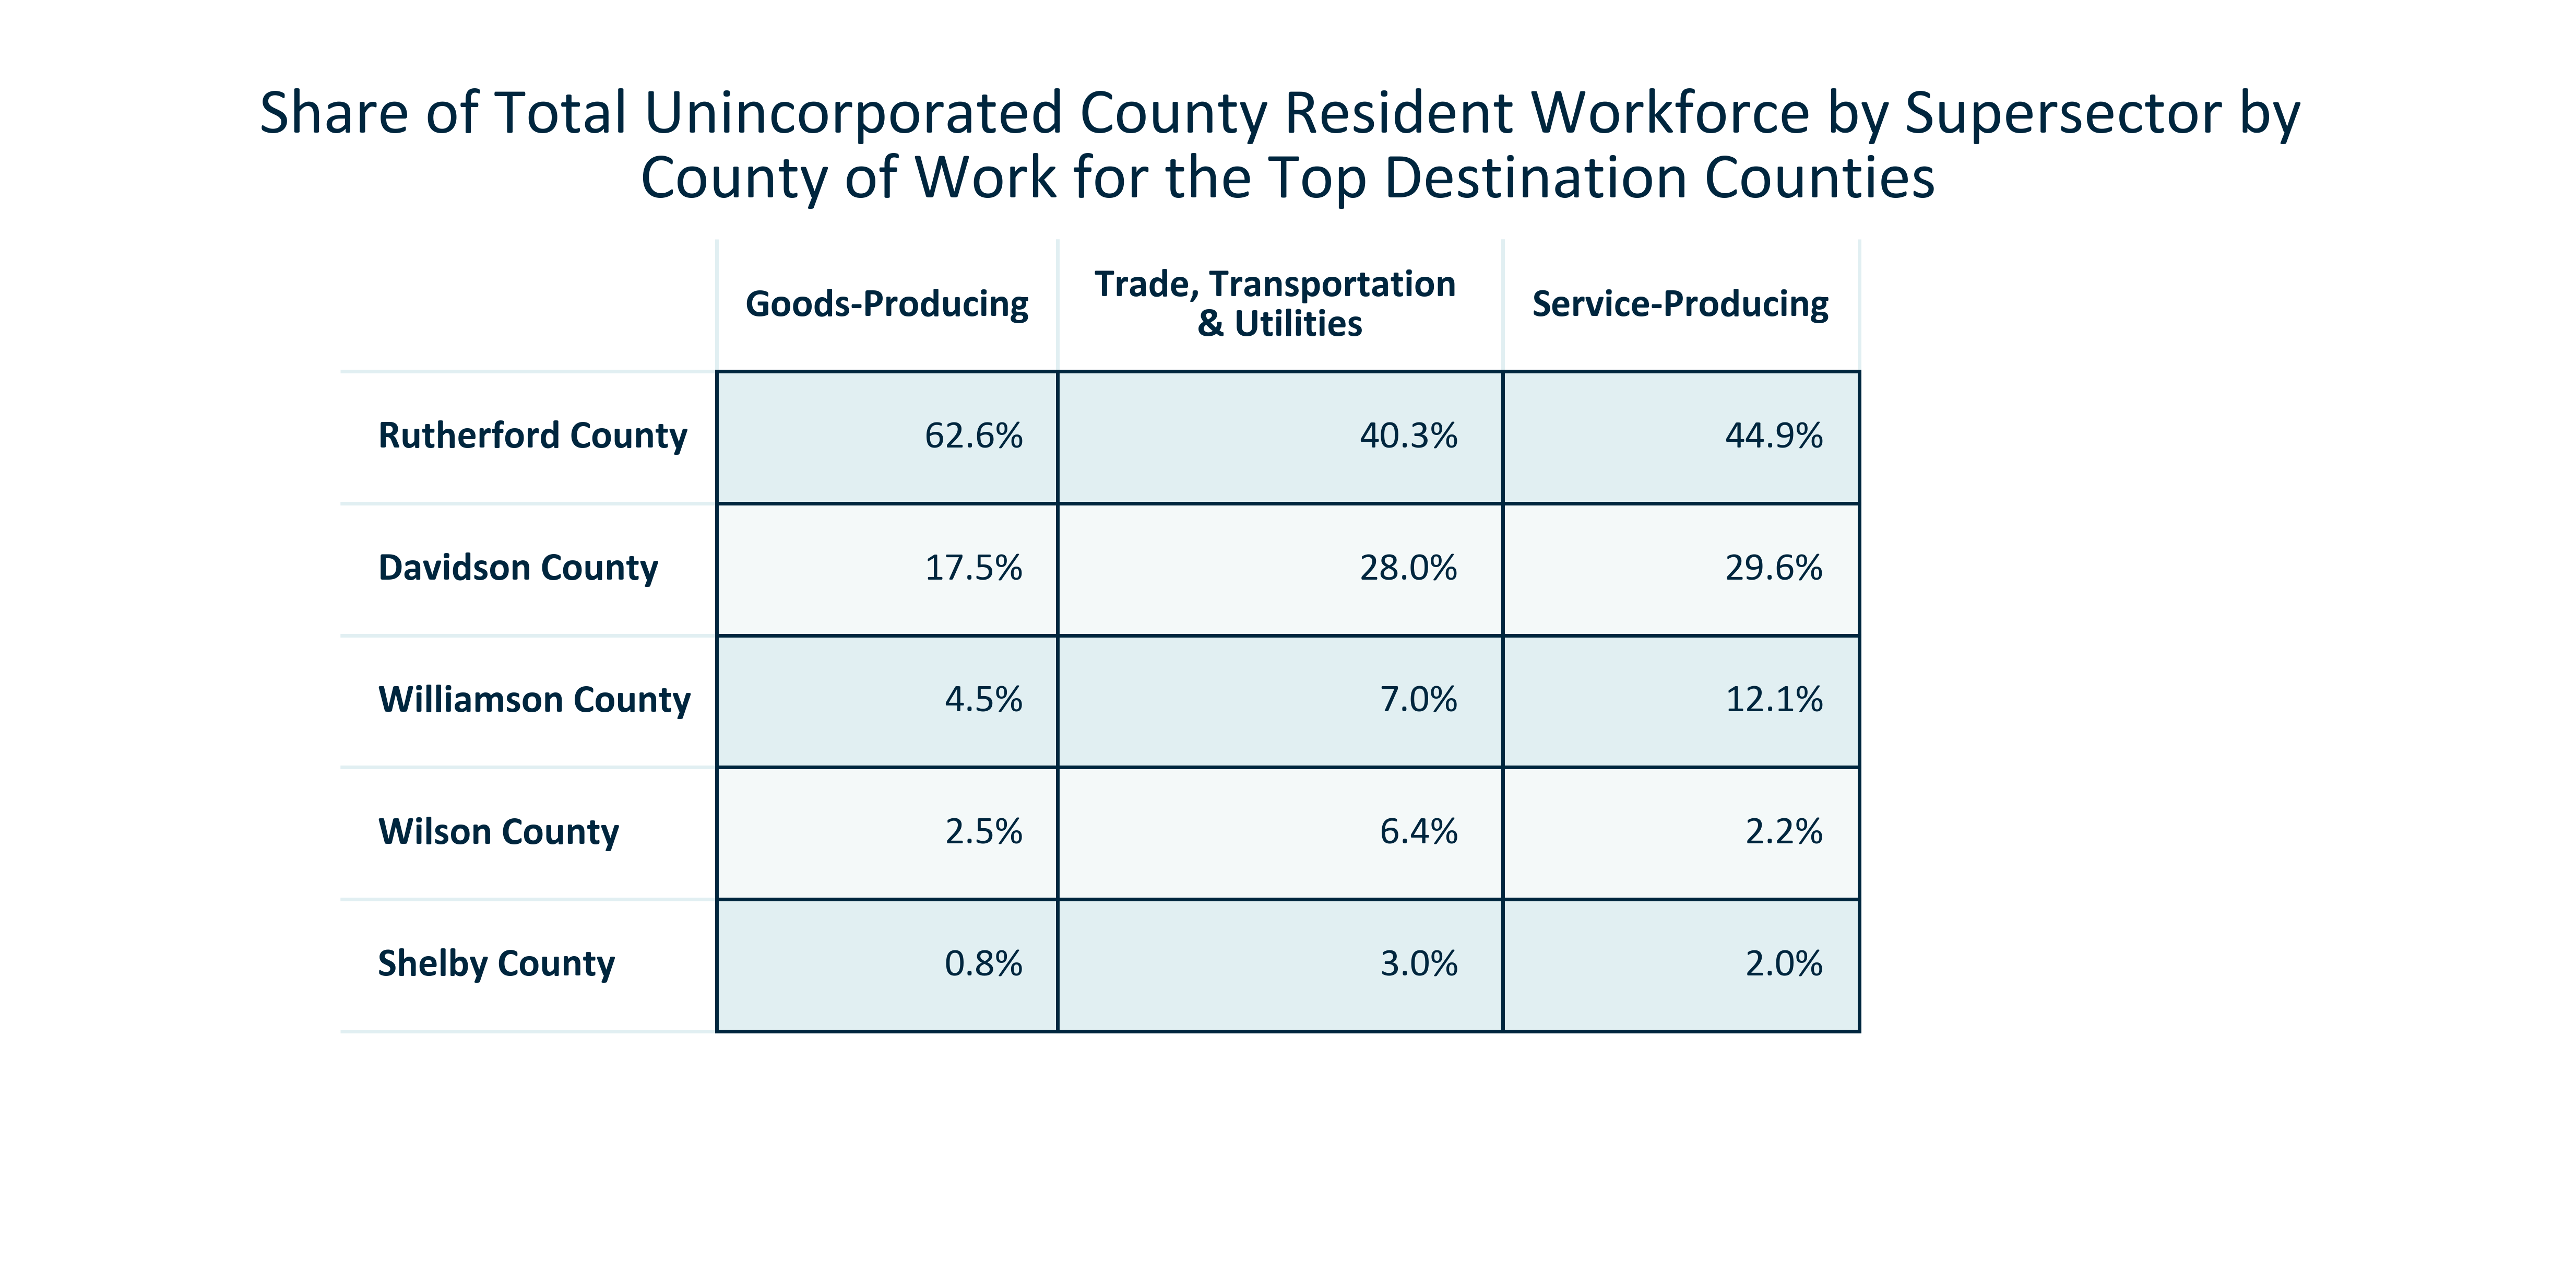

In [96]:
title = 'Share of Total Unincorporated County Resident Workforce by Supersector by \nCounty of Work for the Top Destination Counties'
df_temp = county.sort_values(by = 'Total Jobs', ascending = False)[:5]
df_temp = df_temp.replace({'Shelby County, Tennessee': 'Shelby County'})
df_temp.set_index('Work County', inplace = True)
df_temp = df_temp[['Sector%:All Workers Goods Producing', 
                   'Sector%:All Workers Trade, Transportation & Utilities',
                   'Sector%:All Workers All Other Services']]
df_temp.update(df_temp[['Sector%:All Workers Goods Producing', 
                        'Sector%:All Workers Trade, Transportation & Utilities',
                        'Sector%:All Workers All Other Services']].applymap('{:,.1f}%'.format))
df_temp = df_temp.rename(columns = {'Sector%:All Workers Goods Producing': 'Goods-Producing', 
                                    'Sector%:All Workers Trade, Transportation & Utilities': 'Trade, Transportation \n& Utilities',
                                    'Sector%:All Workers All Other Services': 'Service-Producing'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.8)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcountiessupersector_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentcountiessupersector_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentcountiessupersector_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

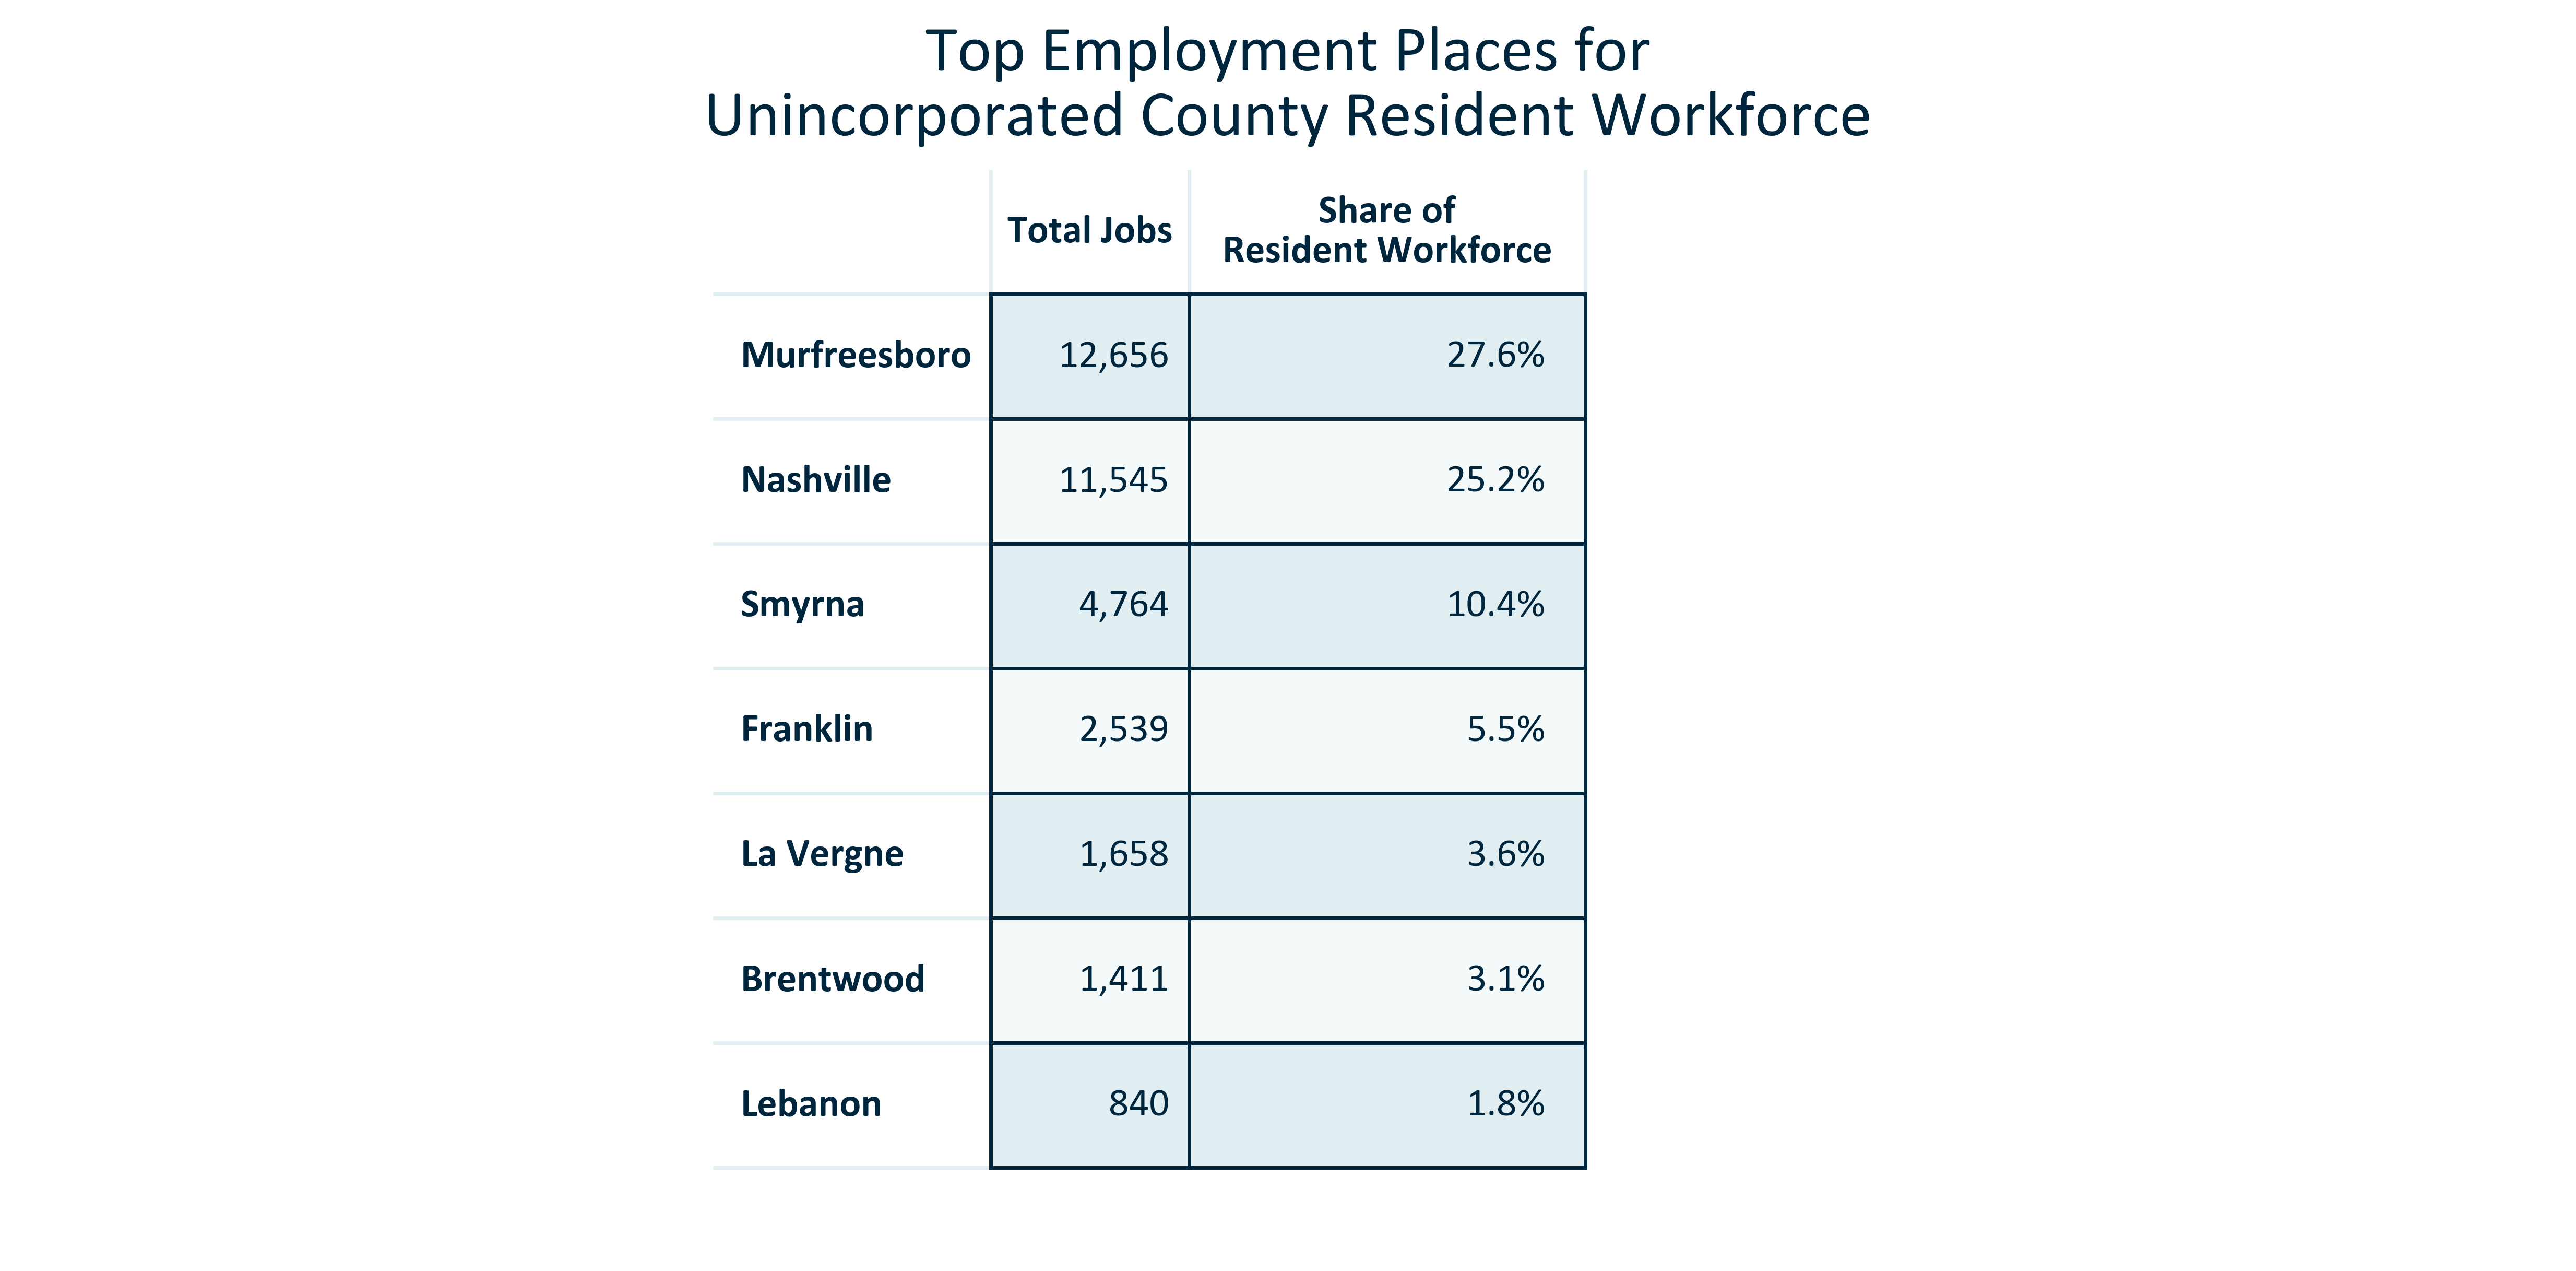

In [97]:
title = 'Top Employment Places for\nUnincorporated County Resident Workforce'
df_temp = place.sort_values(by = 'Total Jobs', ascending = False)[:7]
df_temp = df_temp.replace({'Memphis city, Tennessee': 'Memphis'})
df_temp.set_index('Work Place', inplace = True)
df_temp = df_temp[['Total Jobs', 'Percent of Resident Workforce']]
df_temp.update(df_temp[['Percent of Resident Workforce']].applymap('{:,.1f}%'.format))
df_temp.update(df_temp[['Total Jobs']].applymap('{:,.0f}'.format))
df_temp = df_temp.rename(columns = {'Percent of Resident Workforce': 'Share of\nResident Workforce'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.9)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplaces_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplaces_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentplaces_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

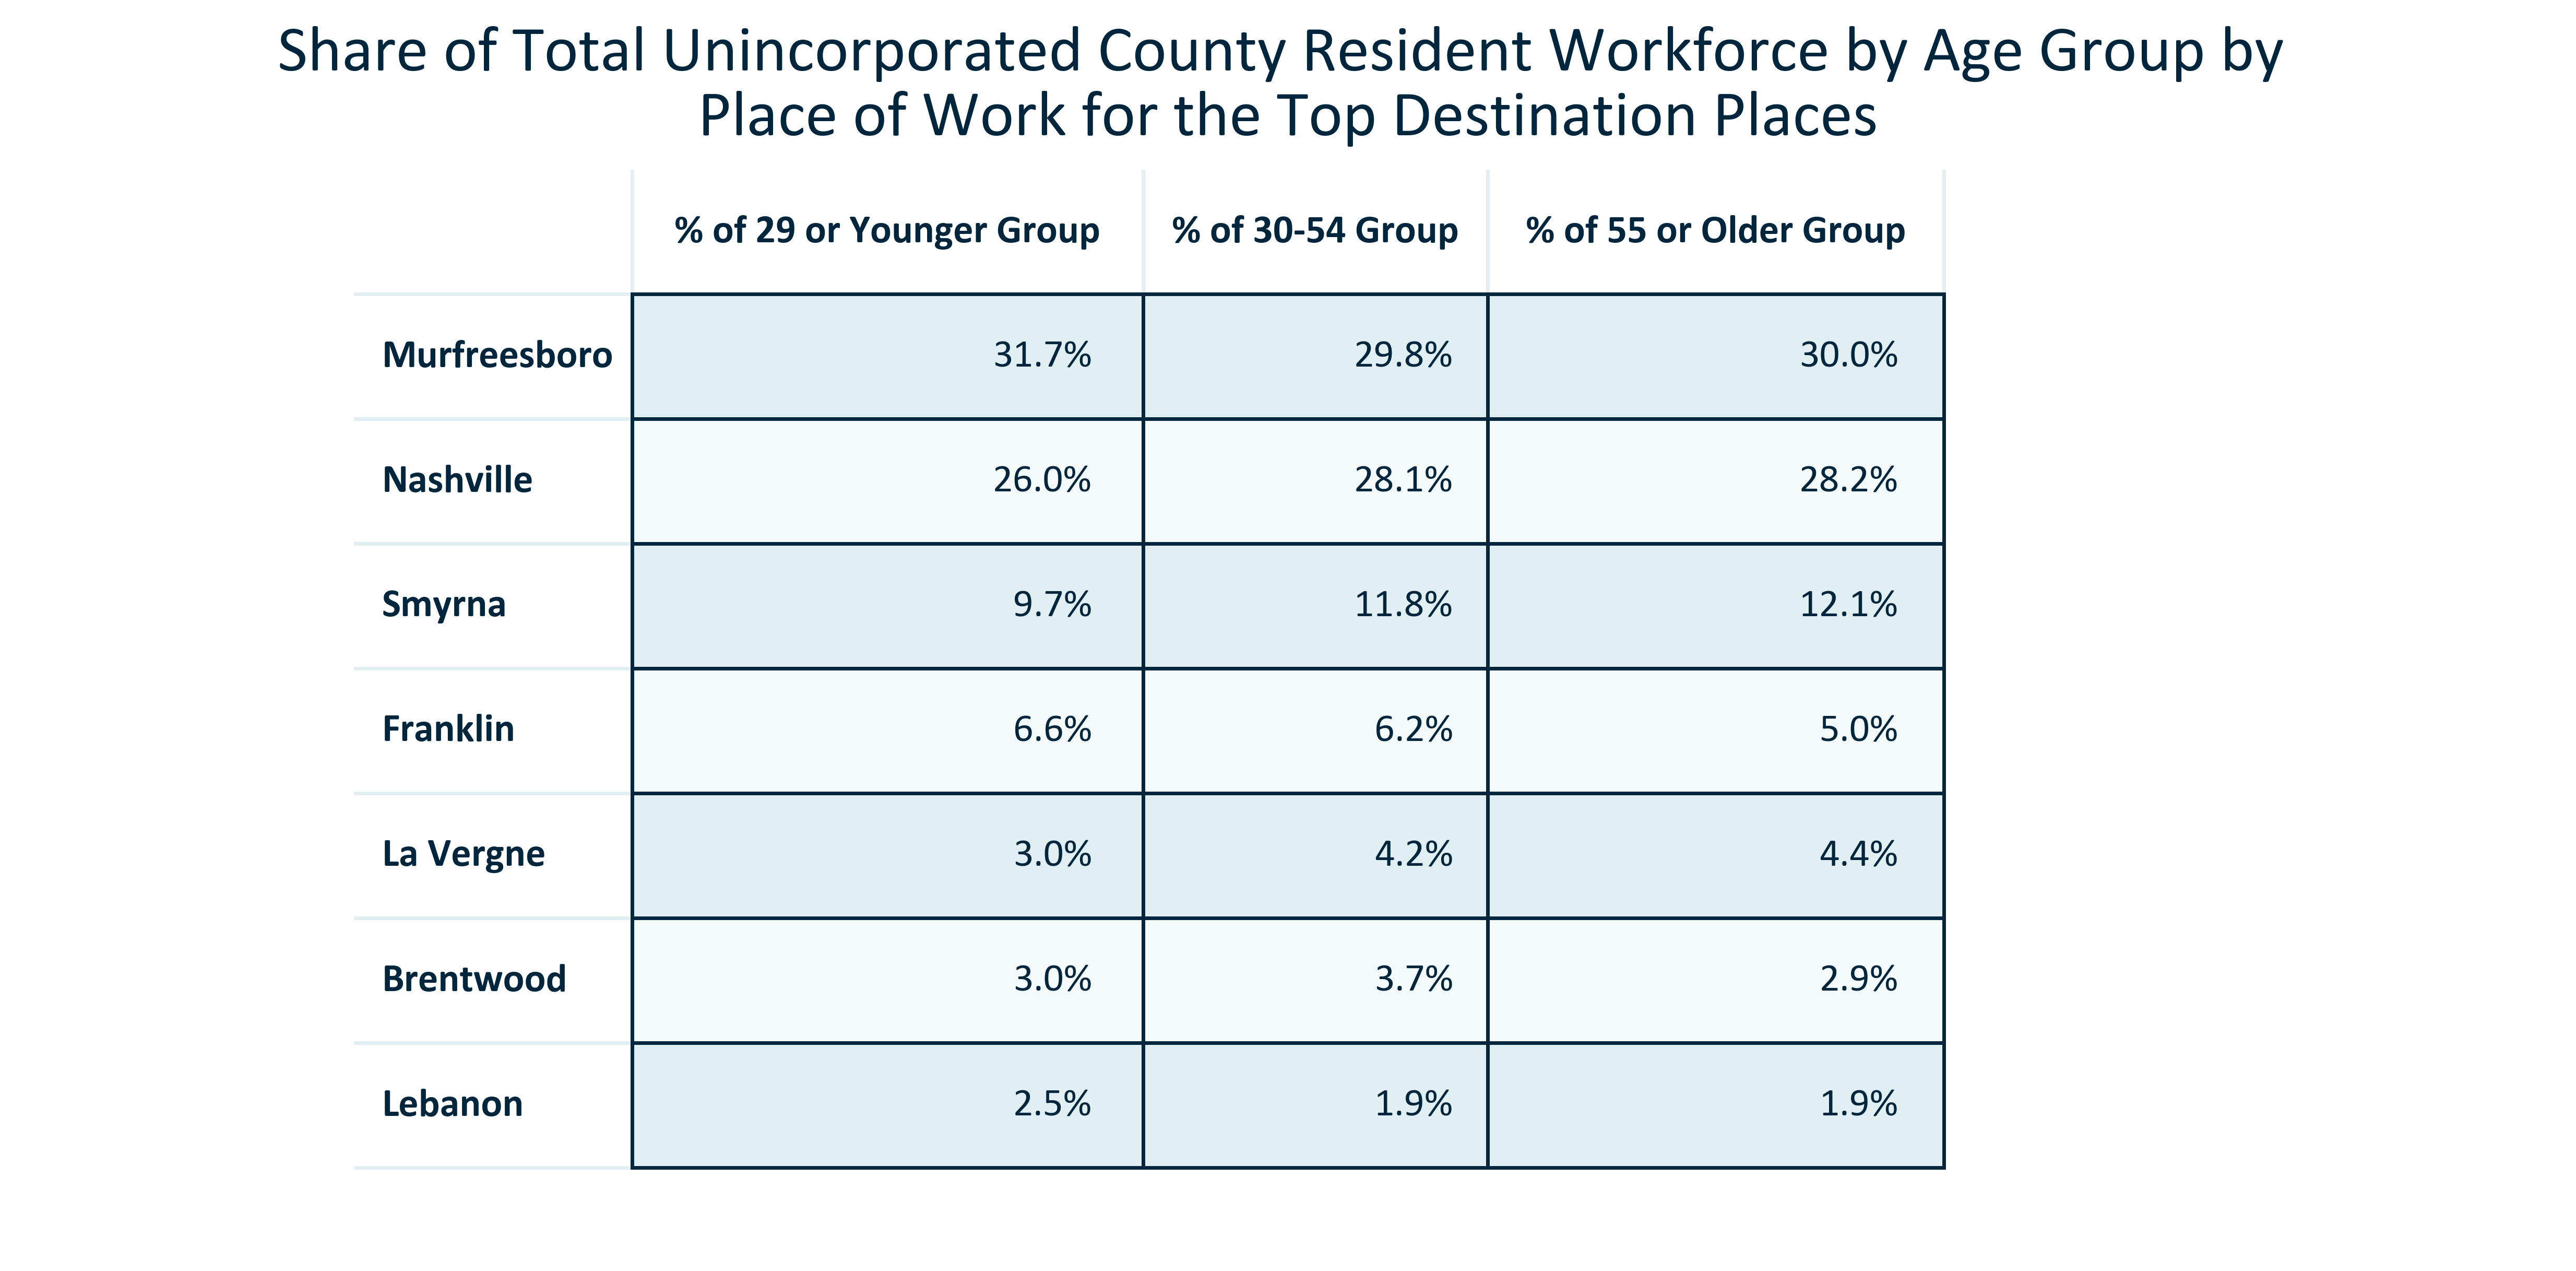

In [98]:
title = 'Share of Total Unincorporated County Resident Workforce by Age Group by \nPlace of Work for the Top Destination Places'
df_temp = place.sort_values(by = 'Total Jobs', ascending = False)[:7]
df_temp = df_temp.replace({'Memphis city, Tennessee': 'Memphis'})
df_temp.set_index('Work Place', inplace = True)
df_temp = df_temp[[#'Age:Workers 29 or Younger',
                   #'Age%:Workers 29 or Younger', 
                   'Age%:All Workers 29 or Younger', 
                   #'Age:Workers 30 to 54',
                   #'Age%:Workers 30 to 54', 
                   'Age%:All Workers 30 to 54', 
                   #'Age:Workers 55 Older',
                   #'Age%:Workers 55 Older', 
                   'Age%:All Workers 55 Older']]
#df_temp.update(df_temp[['Age:Workers 29 or Younger', 'Age:Workers 30 to 54', 'Age:Workers 55 Older']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[[#'Age%:Workers 29 or Younger', 
                        'Age%:All Workers 29 or Younger', 
                        #'Age%:Workers 30 to 54', 
                        'Age%:All Workers 30 to 54', 
                        #'Age%:Workers 55 Older', 
                        'Age%:All Workers 55 Older']].applymap('{:,.1f}%'.format))
df_temp = df_temp.rename(columns = {#'Age:Workers 29 or Younger': '29 or Younger', 
                                    #'Age%:Workers 29 or Younger': '% of Commuters 29 or Younger', 
                                    'Age%:All Workers 29 or Younger': '% of 29 or Younger Group', 
                                    #'Age:Workers 30 to 54': '30 to 54',
                                    #'Age%:Workers 30 to 54': '% of Commuters 30 to 54', 
                                    'Age%:All Workers 30 to 54': '% of 30-54 Group', 
                                    #'Age:Workers 55 Older': '55 or Older',
                                    #'Age%:Workers 55 Older': '% of Commuters 55 or Older',
                                    'Age%:All Workers 55 Older': '% of 55 or Older Group'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.9)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplacesage_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplacesage_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentplacesage_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();

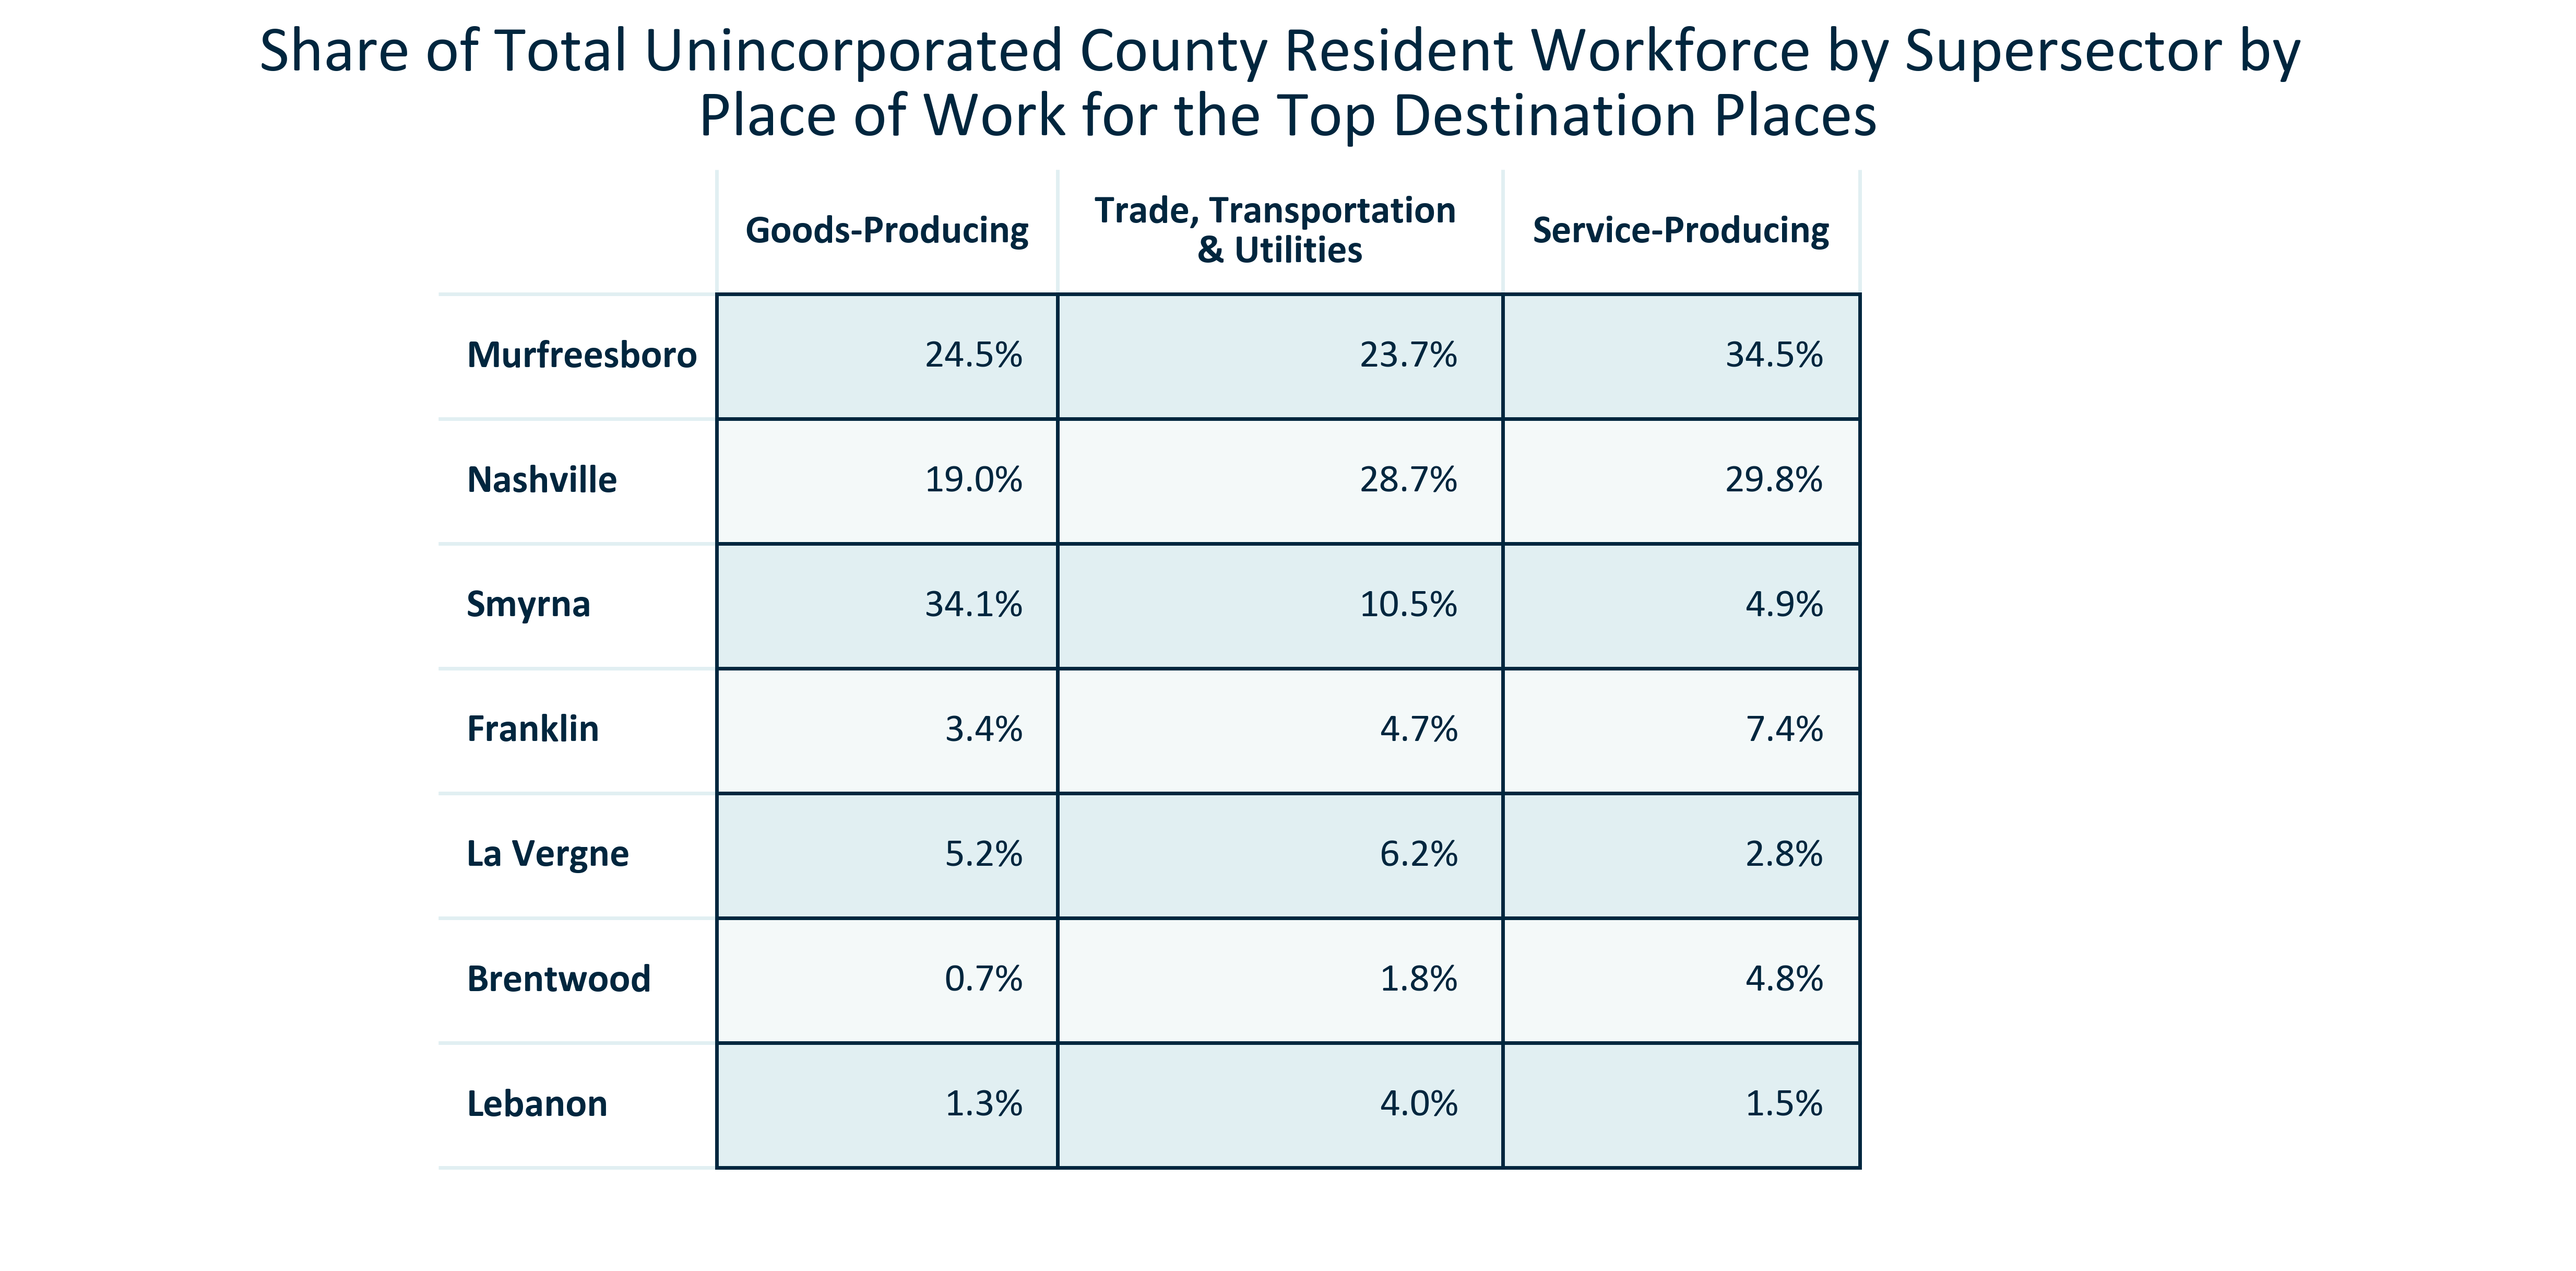

In [99]:
title = 'Share of Total Unincorporated County Resident Workforce by Supersector by \nPlace of Work for the Top Destination Places'
df_temp = place.sort_values(by = 'Total Jobs', ascending = False)[:7]
df_temp = df_temp.replace({'Memphis city, Tennessee': 'Memphis'})
df_temp.set_index('Work Place', inplace = True)
df_temp = df_temp[['Sector%:All Workers Goods Producing', 
                   'Sector%:All Workers Trade, Transportation & Utilities',
                   'Sector%:All Workers All Other Services']]
df_temp.update(df_temp[['Sector%:All Workers Goods Producing', 
                        'Sector%:All Workers Trade, Transportation & Utilities',
                        'Sector%:All Workers All Other Services']].applymap('{:,.1f}%'.format))
df_temp = df_temp.rename(columns = {'Sector%:All Workers Goods Producing': 'Goods-Producing', 
                                    'Sector%:All Workers Trade, Transportation & Utilities': 'Trade, Transportation \n& Utilities',
                                    'Sector%:All Workers All Other Services': 'Service-Producing'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.9)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplacessupersector_2019.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_geocomparative_topemploymentplacessupersector_2019.png', bbox_inches='tight')
with open('../Figures/EMP_table_geocomparative_topemploymentplacessupersector_2019.txt', 'w') as text_file:
    text_file.write('Citation: 2019 LEHD')
plt.show()
plt.close();